# **Machine Learning Final Project**
In Partial Fulfillment Of The Requirements for the Subject Machine Learning

Notebook Prepared by : **Nephea Cagas, Jan Carlo Galinato, Erica Opalla, Hannah Velono, Jan Rey Viudor**

# Seedling Success: Predicting Tree Seedling Survival Using Environmental, Time, and Biochemical Factors

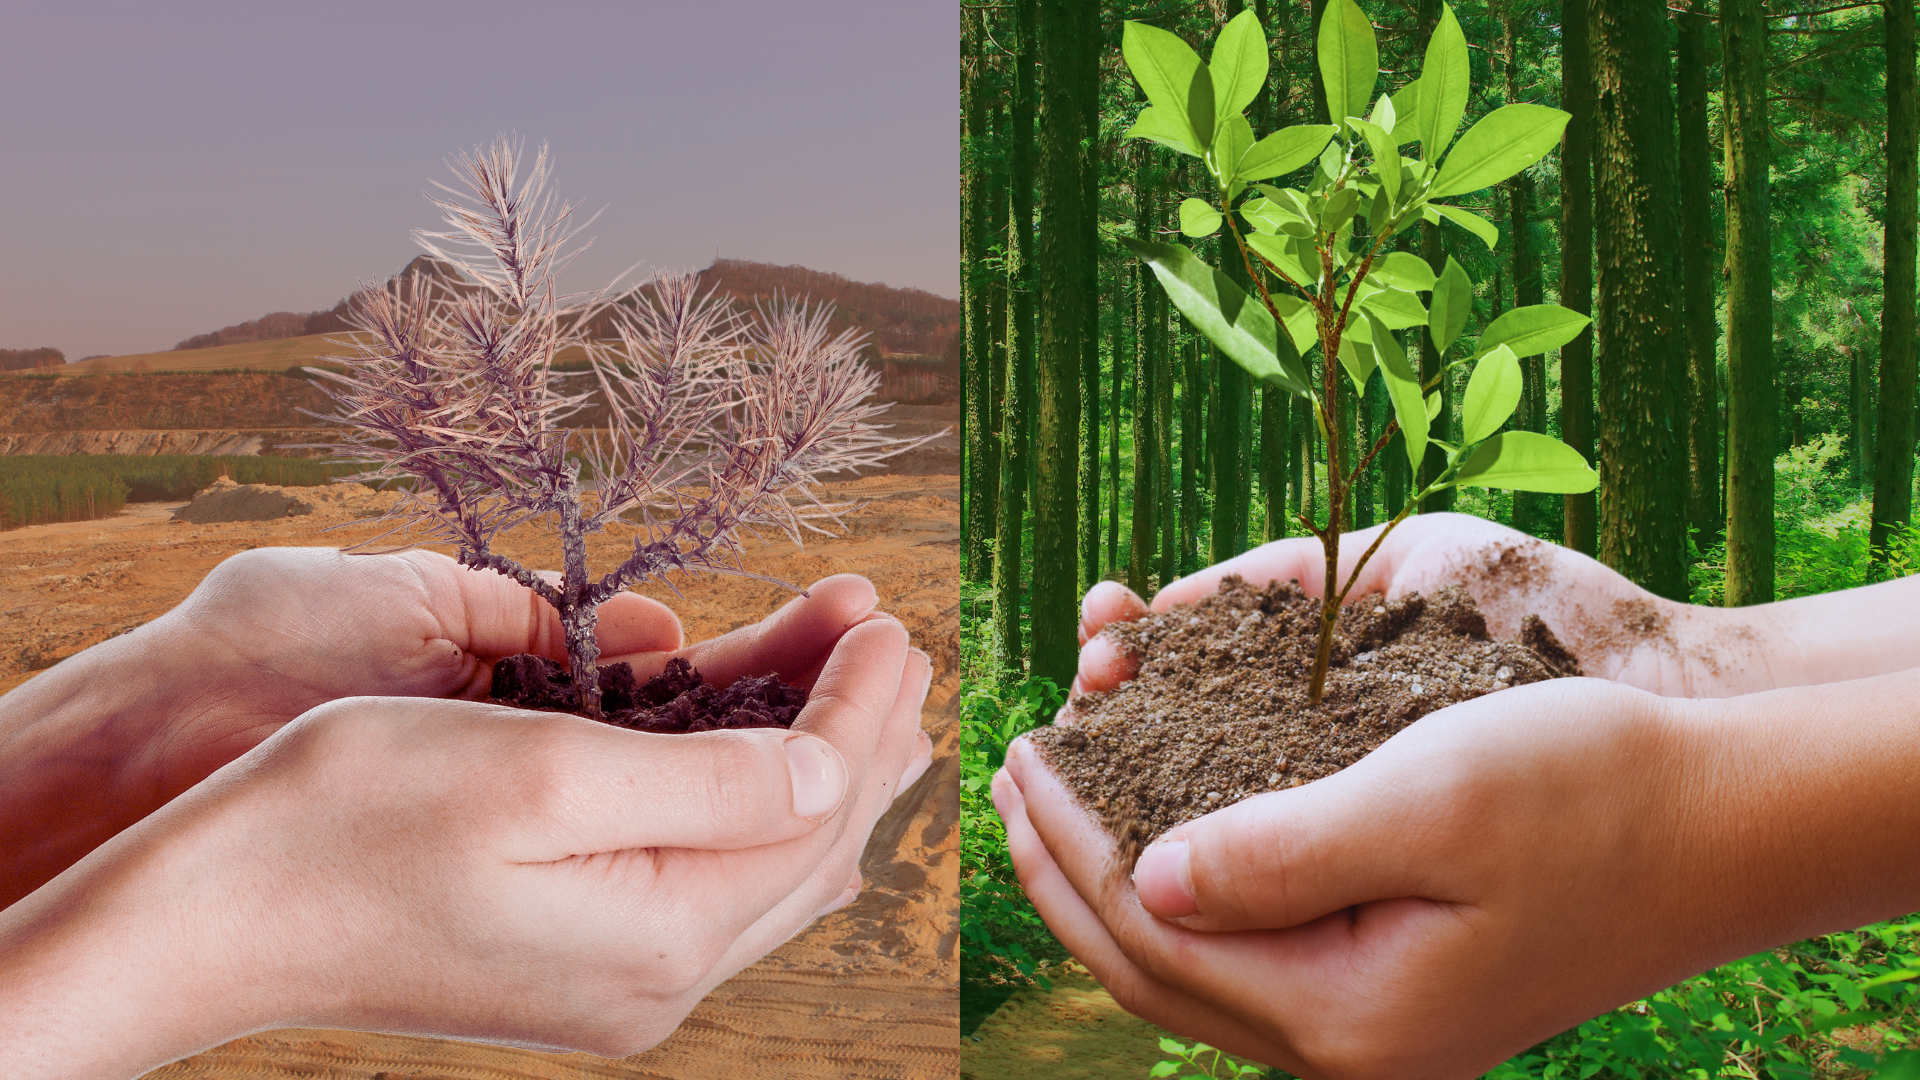

## **1 Executive Summary**

A **Tree seedling** is a very young tree, smaller and more delicate than a sapling. When a **tree seedling dies**, it not only represents a loss of resources and effort invested in its planting but also impacts the local ecosystem. When a **tree seedling survives** and thrives, it contributes to ecosystem health by sequestering carbon, improving air quality, conserving soil moisture, and supporting biodiversity. Our objectives are to know which factors have the most significant impact on the survival rates of different tree species, to know if we can predict the likelihood of death for each seedling based on time And know what are the key differences in the traits or characteristics of surviving versus non-surviving tree seedlings. 
 
Through exploratory data analysis,we saw that most seedlings are in soils with AMF or EMF fungi, with few in sterile soils. Medium light is the most common, with fewer seedlings in low and high light. Seedlings mainly have AMF fungi, indicating it's more common than EMF. Non-sterile soil is used much more often than sterile soil. The most frequent tree species studied are "Acer saccharum" and "Prunus serotina," but there's not much difference in frequency compared to other species. most subplots get moderate light, with fewer getting high or low light. Seedlings usually have low levels of AMF fungi on their roots. Phenolic and lignin levels vary widely, showing some seedlings have a lot and others have little. Non-structural carbohydrate levels are mostly moderate. Data collection mostly happened early or over short periods.


We performed exploratory data analysis again by considering the time.From the chart, we observed that there is a vague pattern represented in the chart.The seedling can’t live more than 30 days, but some seedlings can live to 115 days. We can infer that the seedling is highly sensitive depending on the environment. Some seedlings are harvested early or live to 115 days at the right condition but the rest of them die.There is no linear relationship when we use a pairplot. We tried to create a regression model using different models. As expected, the recent eda implied that the model would perform worse as there are low correlation and the chart displayed no significant pattern. Also the mse metric, most models have an error greater than 600 and MLP has the lowest which is 631, it looks decent but the target range is only 120 days which is too far.

After the EDA, we did one-hot encoding for all categorical columns and checked for multicollinearity using the Variance Inflation Factor (VIF).  (VIF) values suggest that multicollinearity is present among the features in both datasets. Specifically, the try with all the encoded variables shows very high VIF values (e.g., over 10) for several categorical variables like "Phenolics," "Lignin," and "NSC," indicating strong multicollinearity among these variables. Similarly, the second try focusing on continuous variables also exhibits moderate to high VIF values for key predictors such as "Light_ISF," "Lignin," and "NSC," but lower than the first one.

Gradient Boosting did the best in our modeling with an accuracy of 98.42% beating our pcc accuracy of 63.74%. The model correctly predicted 285 seedlings that died and 396 seedlings that survived. There were 9 seedlings predicted to survive but actually died and 6 seedlings predicted to die but actually survived. This indicates the model is highly accurate, with very few mistakes in predicting seedling survival and death.Based on the feature importance results from decision tree model variants, **Time** topped the list as the most important feature that has the greatest impact on the prediction model, **Phenolics** did second. This was consistent with what was obtained using SHAP (SHapley Additive exPlanations), **Time** still topped the feature importance rank.

Overall, unless we became the seedling itself, we won't know what factors influence the seedlings death or survival. However, with the help of machine learning, we learned that the factors with the most significant impact on the survival rates of different tree species, according to the feature importance plot of the gradient boosting model, are most significantly impacted by the duration they have been monitored (Time), levels of phenolic compounds (Phenolics), presence of arbuscular mycorrhizal fungi (AMF), lignin content (Lignin), light intensity (Light_ISF), and non-structural carbohydrates (NSC). These factors influence growth, defense mechanisms, and the ability to withstand environmental stressors, thereby determining the likelihood of survival.

## **2 Introduction**

**Tree planting** involves moving young tree seedlings to a new location, usually for purposes such as forestry, land reclamation, or landscaping. This process is different from transplanting larger trees, which is done in arboriculture, and from simply spreading tree seeds, which is cheaper but less reliable and slower *(Wikipedia contributors, 2024)*. A **tree seedling** is a very young tree, smaller and more delicate than a sapling. In its early growth stage, it typically has only a few leaves and a thin stem *("Seedling," 2024)*. This fragile stage requires careful handling and nurturing to ensure the seedling can grow into a strong, healthy tree. Properly planting and caring for these seedlings is essential for their survival and for the success of tree planting efforts.

However, if a tree seedling fails to survive due to inadequate care, environmental stressors, or other factors, it can have significant consequences.
When a **tree seedling dies**, it not only represents a loss of resources and effort invested in its planting but also impacts the local ecosystem. Failed tree plantings can result in barren patches of land that are susceptible to erosion, soil degradation, and loss of biodiversity. Moreover, the absence of trees diminishes the ecosystem's capacity to mitigate climate change by reducing carbon dioxide levels, regulating temperatures, and providing habitat for wildlife. In contrast, when a **tree seedling survives** and thrives, it contributes to ecosystem health by sequestering carbon, improving air quality, conserving soil moisture, and supporting biodiversity.


The importance of successfully planting and nurturing tree seedlings extends beyond individual sites to global environmental sustainability. Planting trees has many important benefits for the environment. One key benefit is that trees **help fight climate change by absorbing carbon dioxide from the atmosphere.** This helps reduce the amount of greenhouse gases, which is crucial for controlling global warming. Trees also **provide shade and cool the air**, which can help lower temperatures in urban areas. Additionally, trees produce oxygen, which is essential for all living beings. In the Philippines, tree planting is especially important. The country is naturally green, but many trees are being cut down at an alarming rate. This deforestation leads to serious problems like droughts, floods, and landslides. The Philippines is also located in the Pacific Ring of Fire, where many typhoons occur each year. **Planting trees can help protect the environment and reduce the impact of these natural disasters.** Tree planting involves transplanting young tree seedlings, which are small and fragile trees in the early stages of growth, to areas where they can grow and thrive.
*(Tree Planting Philippines – Eight Benefits of Tree Planting (n.d.-b))*

## **3 Problem Statement, and Objective**

Our investigation will focus on answering three critical questions: Firstly, which factors have the most significant impact on the survival rates of different tree species? Can we predict the likelihood of death for each seedling based on time? And finally, what are the key differences in the traits or characteristics of surviving versus non-surviving tree seedlings?.This project aims to identify the key factors that distinguish the survival and mortality outcomes of tree seedlings in varying environmental conditions

## **4 Methodology**

# 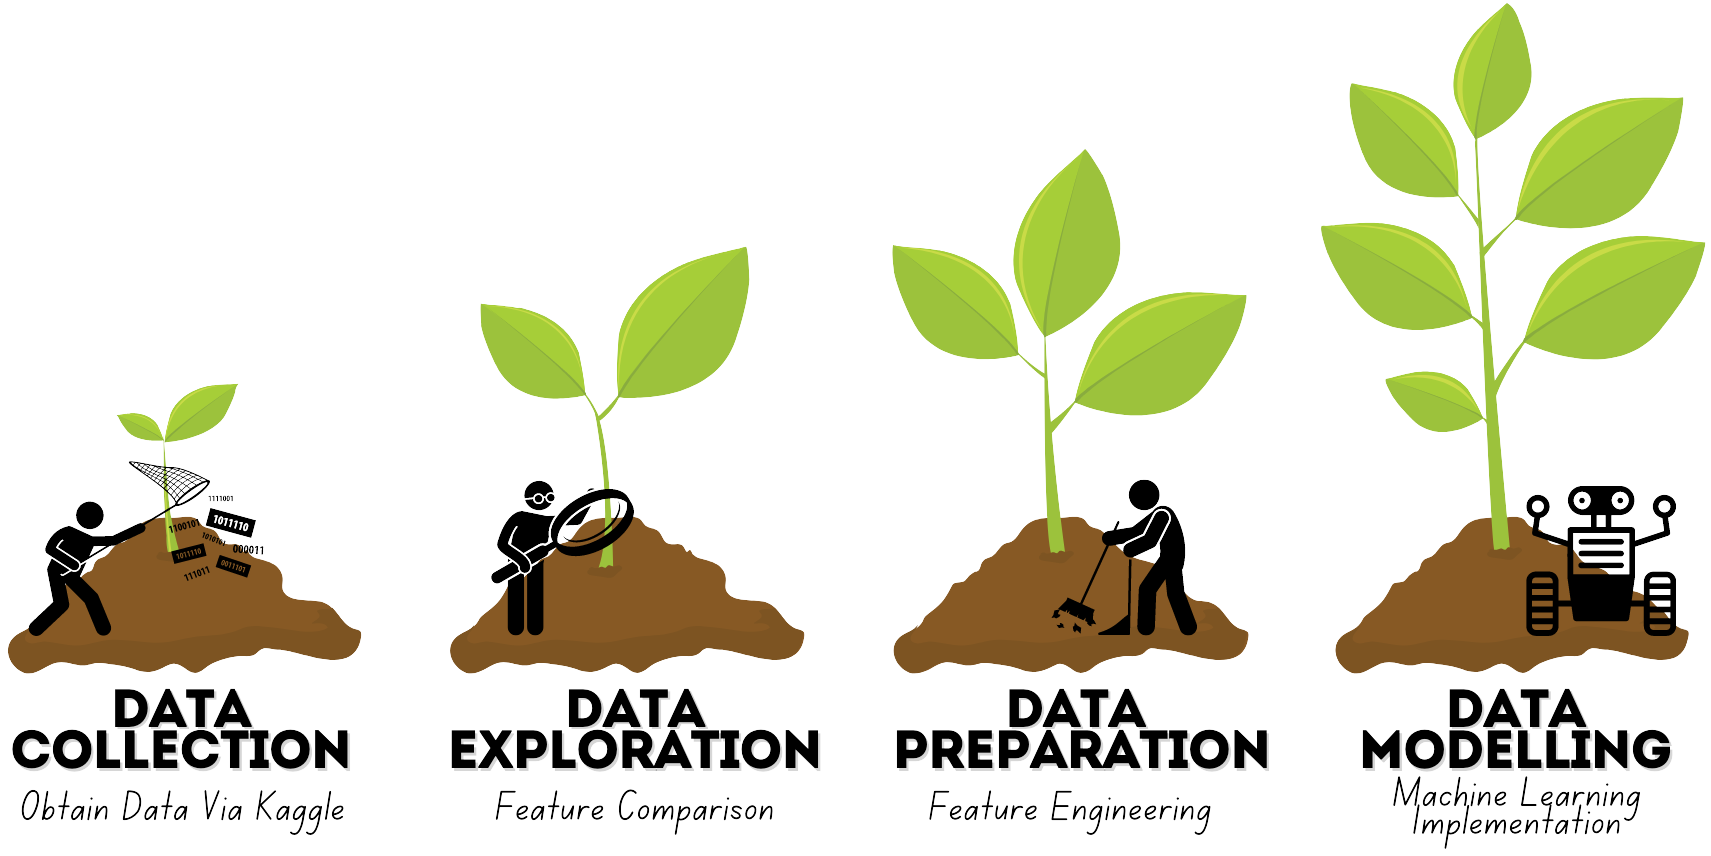

## **4.1 Data Description | Cleaning**

The dataset used in this study was obtained from **Kaggle**, a popular platform for data science and machine learning competitions, as well as a repository for datasets, code, and tutorials related to various fields. The experiment itself was conducted by researchers, Katherine Wood, Richard Kobe, Inés Ibáñez, and Sarah McCarthy-Neumannfrom Michigan State University, University of Michigan-Ann Arbor, and Tennessee State University. Their research facility was based at Michigan State University.

The experiment employed a factorial blocked design field experiment approach, involving four tree species, seven soil sources (including sterilized conspecific, live conspecific, and five heterospecific), and a gradient of forest understory light levels categorized as low, medium, and high. In total, 3,024 seedlings were utilized for the experiment. The researchers monitored seedling survival twice per week over one growing season and selected random subsets of seedlings to measure mycorrhizal colonization and phenolics, lignin, and NSC measurements at three weeks. To analyze the data, Cox proportional hazards survival models were employed to evaluate survival rates, while linear mixed effects models were used to assess how light availability and soil source influenced various traits. Additionally, it provided 24 feature columns.

**Detailed information about each feature follows:**

| Feature | DataType | Definition |
| :- | :-: | :- |
| **No** | int64 |  A unique number assigned to each individual seedling for identification purposes. |
| **Plo**t | int64 | Number representing the specific area of land where the seedling was planted, ranging from 1 to 18. |
| **Subplot** | object |   A smaller division within each plot, divided into 5 sections (one at each corner and one in the middle), labeled as A, B, C, D, and E. |
| **Species** | object  | Tree species, including Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.
| **Light ISF** | float64 | The amount of light reaching each subplot at a height of 1m.
| **Light Cat** | object | Category of light level, categorized as low, medium, or high|
| **Core** | int64 |  Year when a soil core sample was taken from the field.
| **Soil** | object | Type of soil the seedling was planted in, including different tree species and sterilized soil.
| **Adult** | object | Tree from which the soil sample was taken.
| **Sterile** | object | Indicates whether the soil was sterilized or not.
| **Conspecific** | object | Indicates whether the soil was conspecific, heterospecific, or sterilized conspecific.
| **Myco** | object | Mycorrhizal type of the seedling species (AMF or EMF).
| **SoilMyco** | object | Mycorrhizal type of the species culturing the soil (AMF or EMF).|
| **PlantDate** | object |  The date when seedlings were planted in the field pots.|
| **AMF** | float64 | Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.
| **EMF** | float64 | Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.
| **Phenolics** | float64 | Calculated as nmol Gallic acid equivalents per mg dry extract
| **NSC** | float64 | Calculated as percent dry mass nonstructural carbohydrates.
| **Lignin** | float64 | Calculated as percent dry mass lignin.
| **Census** | int64 | The specific observation period or event number at which the seedling died or was harvested.|
| **Time** | float64 | The specific observation period or event number at which the seedling died or was harvested.|
| **Event** | float64 | Used for survival analysis to indicate the status of each individual seedling at a given time. 0 = harvested or experiment ended, 1 = dead.
| **Harvest** | object | Indicates whether the seedling was harvested for trait measurement.
| **Alivet** | object | Indicates if the seedling was alive at the end of the second growing season, with "X" indicating alive status.

### **Import Libraries | Load Dataset**

In [63]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mglearn
import shap
import itertools

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [66]:
url = 'https://raw.githubusercontent.com/NephCgs/jnotebook/main/Tree_Data.csv'
df = pd.read_csv(url)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [68]:
# drop columns not relevant in the project scope
df = df.drop(columns=['No','Plot', 'Subplot', 'PlantDate', 'Census', 'Harvest', 'Alive', 'Core'], axis=1)
df.head()

Species  Light_ISF Light_Cat             Soil Adult      Sterile  \
0  Acer saccharum      0.106       Med  Prunus serotina     I  Non-Sterile   
1    Quercus alba      0.106       Med    Quercus rubra   970  Non-Sterile   
2   Quercus rubra      0.106       Med  Prunus serotina     J  Non-Sterile   
3  Acer saccharum      0.080       Med  Prunus serotina     J  Non-Sterile   
4  Acer saccharum      0.060       Low  Prunus serotina   689  Non-Sterile   

      Conspecific Myco SoilMyco    AMF    EMF  Phenolics  Lignin    NSC  \
0  Heterospecific  AMF      AMF  22.00    NaN      -0.56   13.86  12.15   
1  Heterospecific  EMF      EMF  15.82  31.07       5.19   20.52  19.29   
2  Heterospecific  EMF      AMF  24.45  28.19       3.36   24.74  15.01   
3  Heterospecific  AMF      AMF  22.23    NaN      -0.71   14.29  12.36   
4  Heterospecific  AMF      AMF  21.15    NaN      -0.58   10.85  11.20   

    Time  Event  
0   14.0    1.0  
1  115.5    0.0  
2   63.0    1.0  
3   14.0    1.0  
4   14.0    1.0

In [69]:
df.isnull().sum()

Species           0
Light_ISF         0
Light_Cat         0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Time              0
Event             1
dtype: int64

In [70]:
df.Adult.unique()

array(['I', '970', 'J', '689', '1332', '891', '1595', '1323', '394',
       '561', '1478', '1320', '1454', '921', '984', '118', '1757', '1384',
       '1688', '961', '1715', '50', '1468', '1201', '1386', '277', '415',
       '285', '275', '1205', '1330', '1297', '1326', 'H', '1027', 'G'],
      dtype=object)

## **4.2 Data Exploration (Exploratory Data Analysis)**

In [71]:
df.describe()

Light_ISF          AMF         EMF    Phenolics       Lignin  \
count  2783.000000  2783.000000  1283.00000  2783.000000  2783.000000   
mean      0.085707    20.553069    26.47675     1.933105    15.759792   
std       0.025638    12.309587    16.63689     1.969842     6.779607   
min       0.032000     0.000000     0.00000    -1.350000     2.230000   
25%       0.066000    13.400000    13.78000     0.170000    10.355000   
50%       0.082000    18.000000    27.72000     0.750000    14.040000   
75%       0.100000    24.445000    35.71000     3.780000    21.115000   
max       0.161000   100.000000    87.50000     6.100000    32.770000   

               NSC         Time        Event  
count  2783.000000  2783.000000  2782.000000  
mean     14.219641    53.487244     0.570453  
std       4.298271    32.082942     0.495100  
min       4.300000    14.000000     0.000000  
25%      11.605000    24.500000     0.000000  
50%      12.660000    45.500000     1.000000  
75%      17.275000    63.000000     1.000000  
max      29.450000   115.500000     1.000000

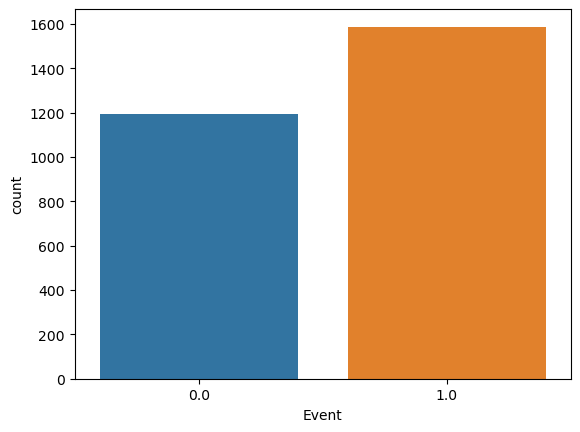

In [72]:
sns.countplot(x='Event', data=df)
plt.show()

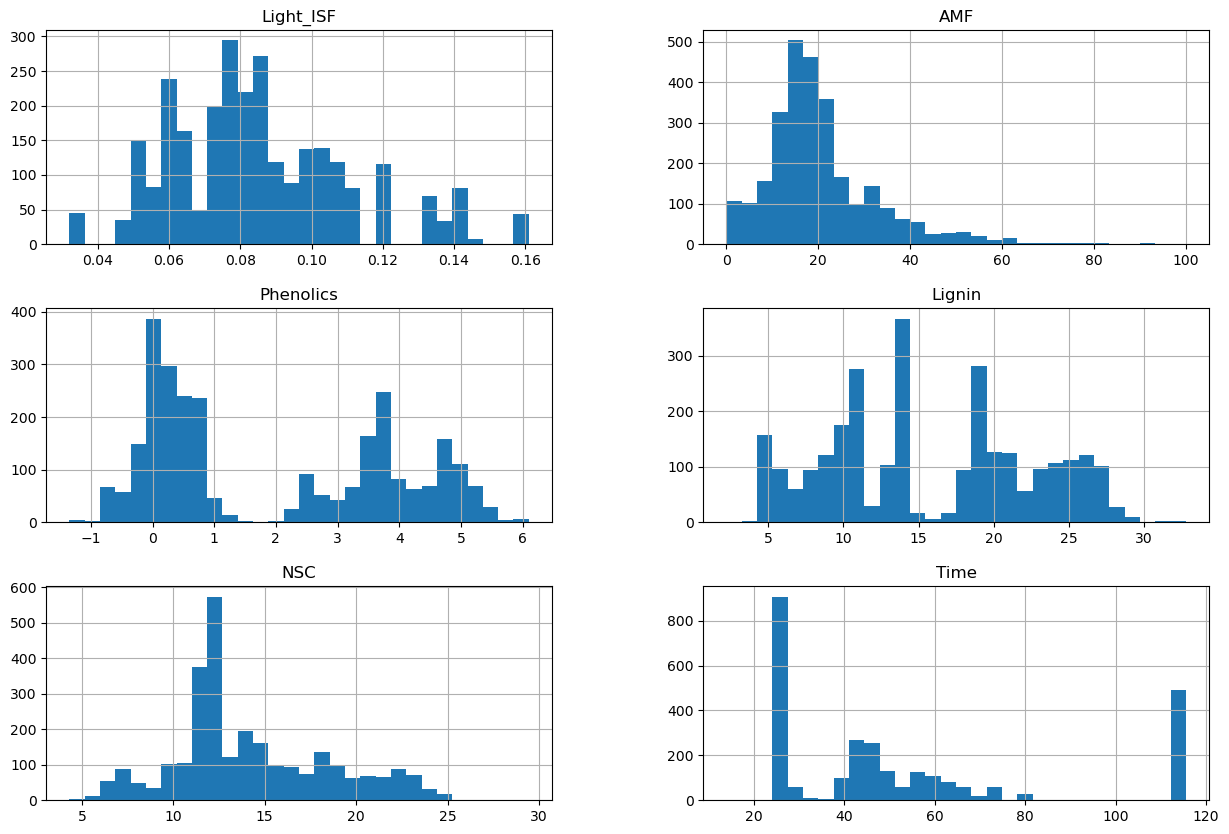

In [73]:
numerical_cols = ['Light_ISF', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time']
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.show()

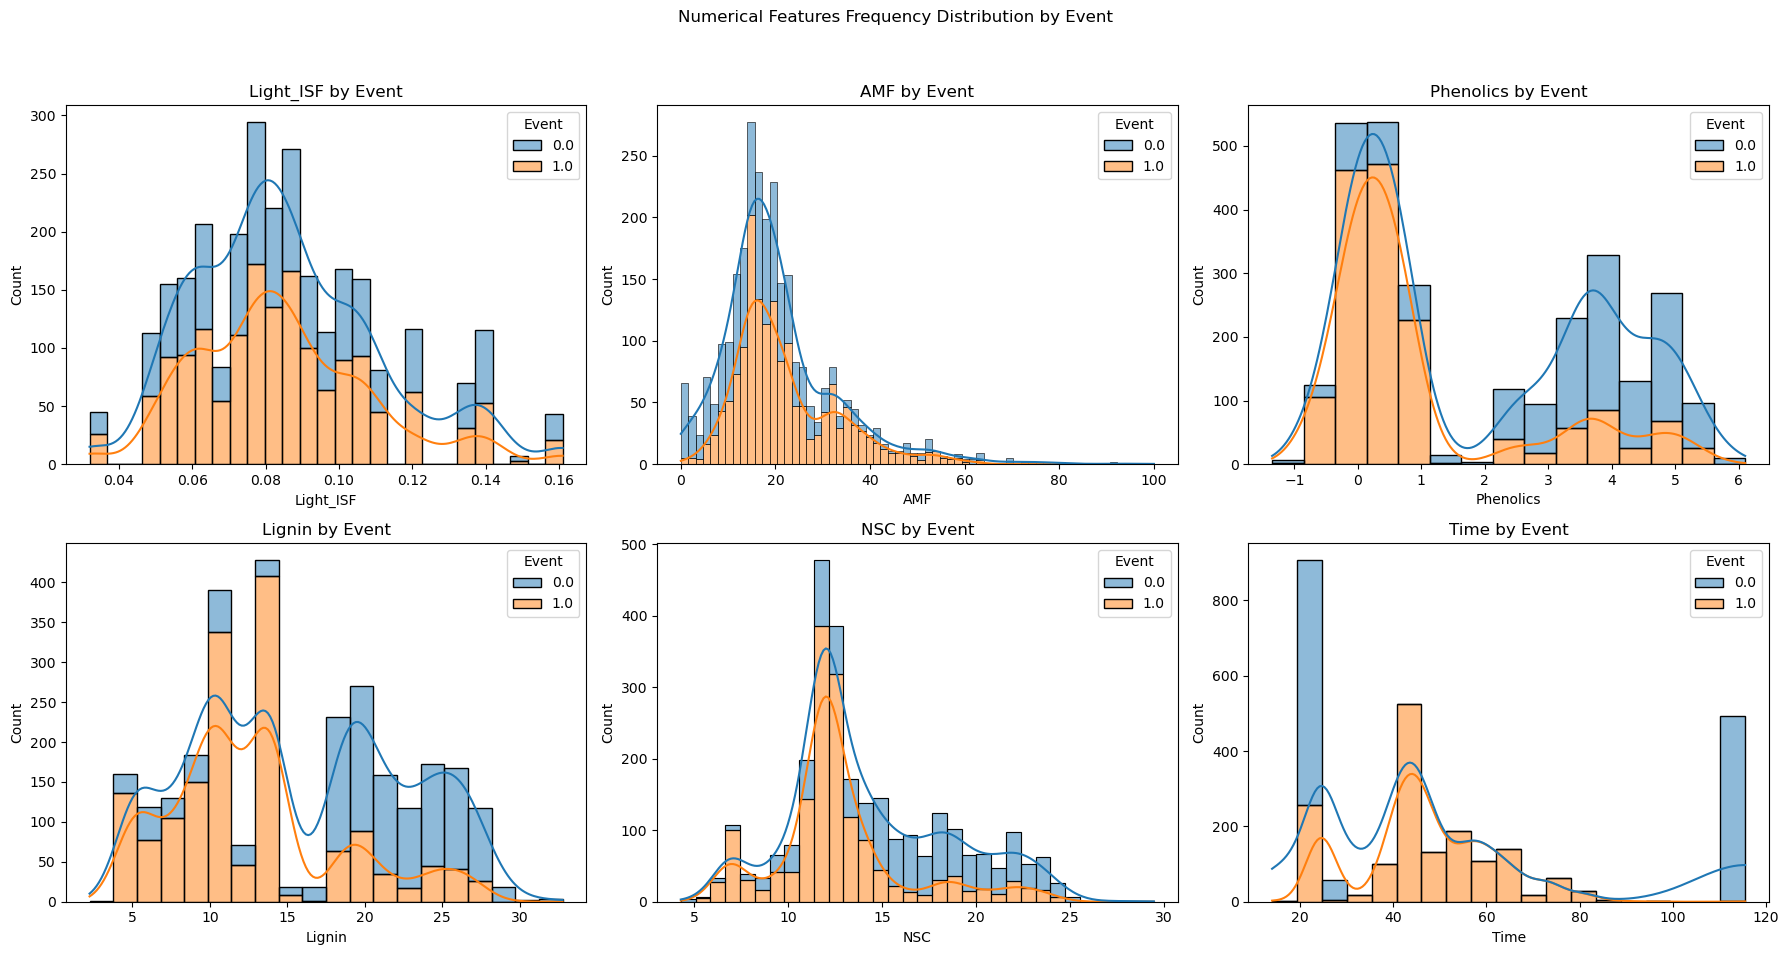

In [150]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Numerical Features Frequency Distribution by Event')

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, hue='Event', kde=True, ax=axes[i//3, i%3], multiple="stack")
    axes[i//3, i%3].set_title(f'{col} by Event')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

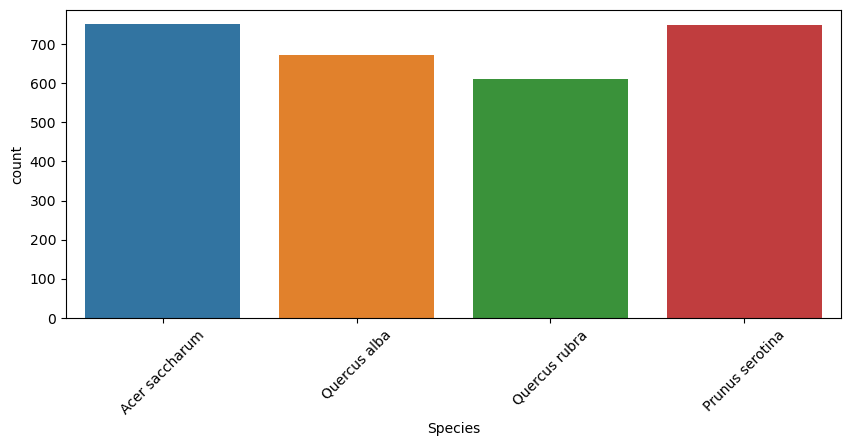

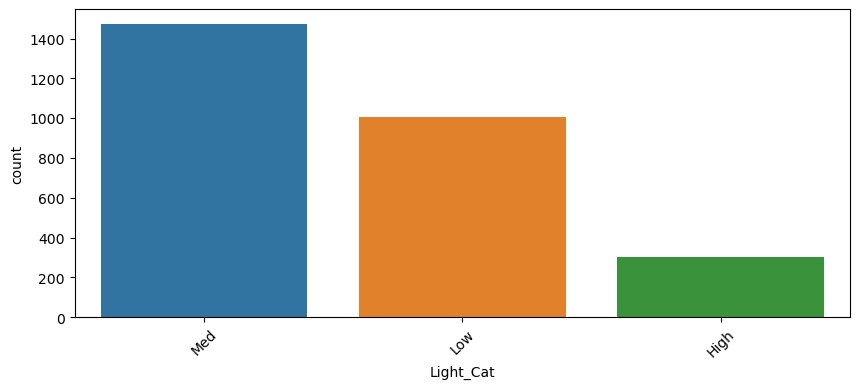

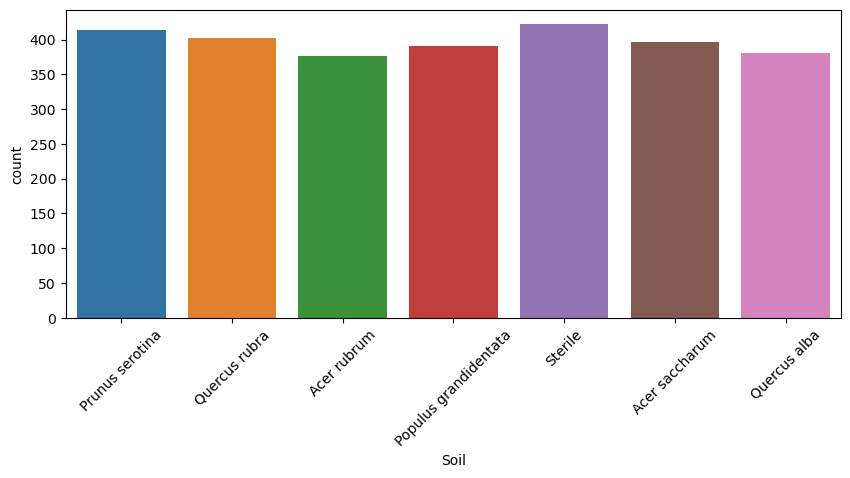

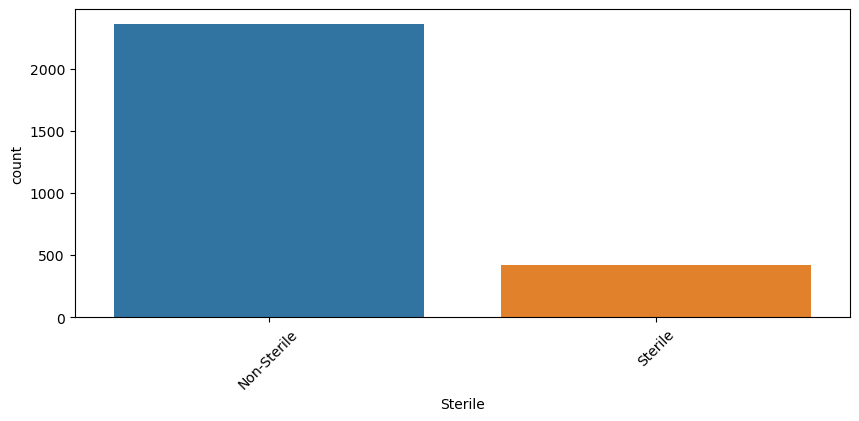

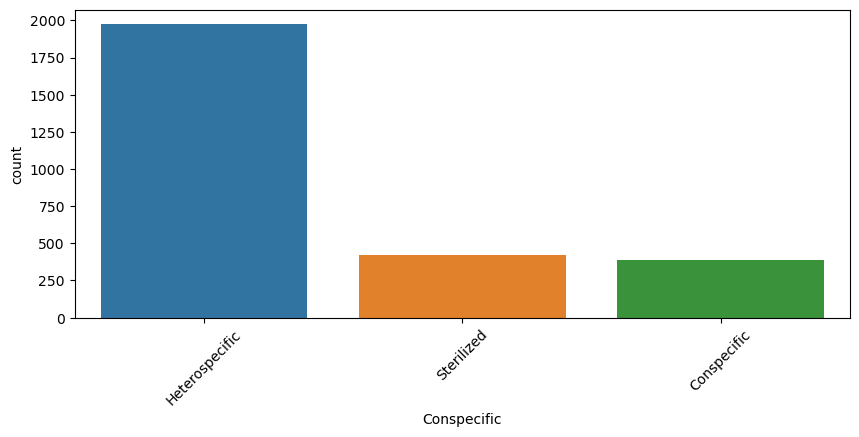

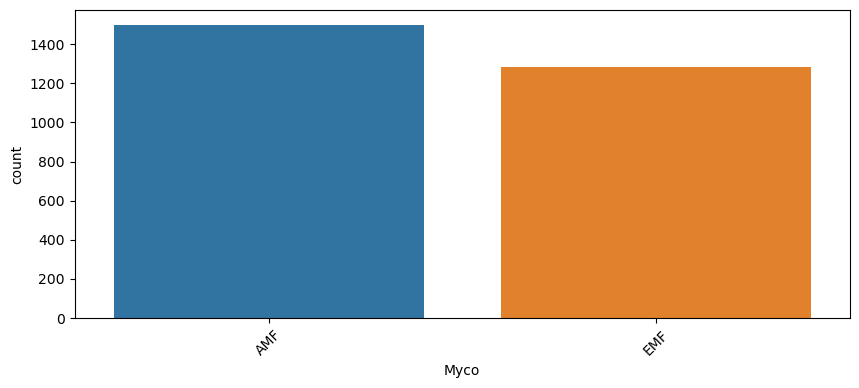

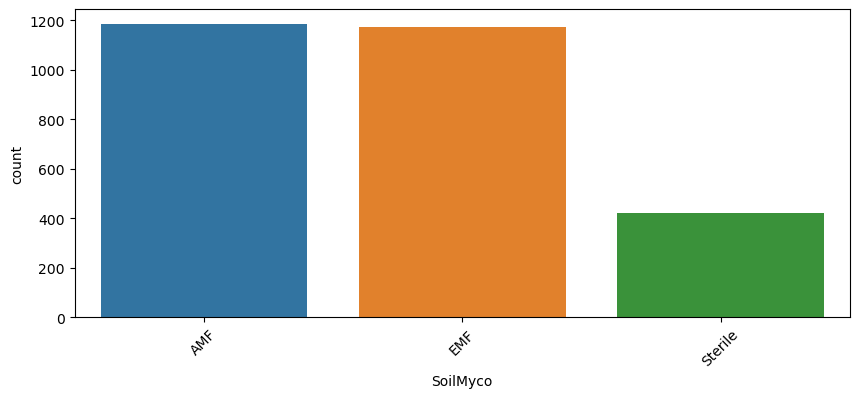

In [148]:
categorical_cols = ['Species', 'Light_Cat', 'Soil', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

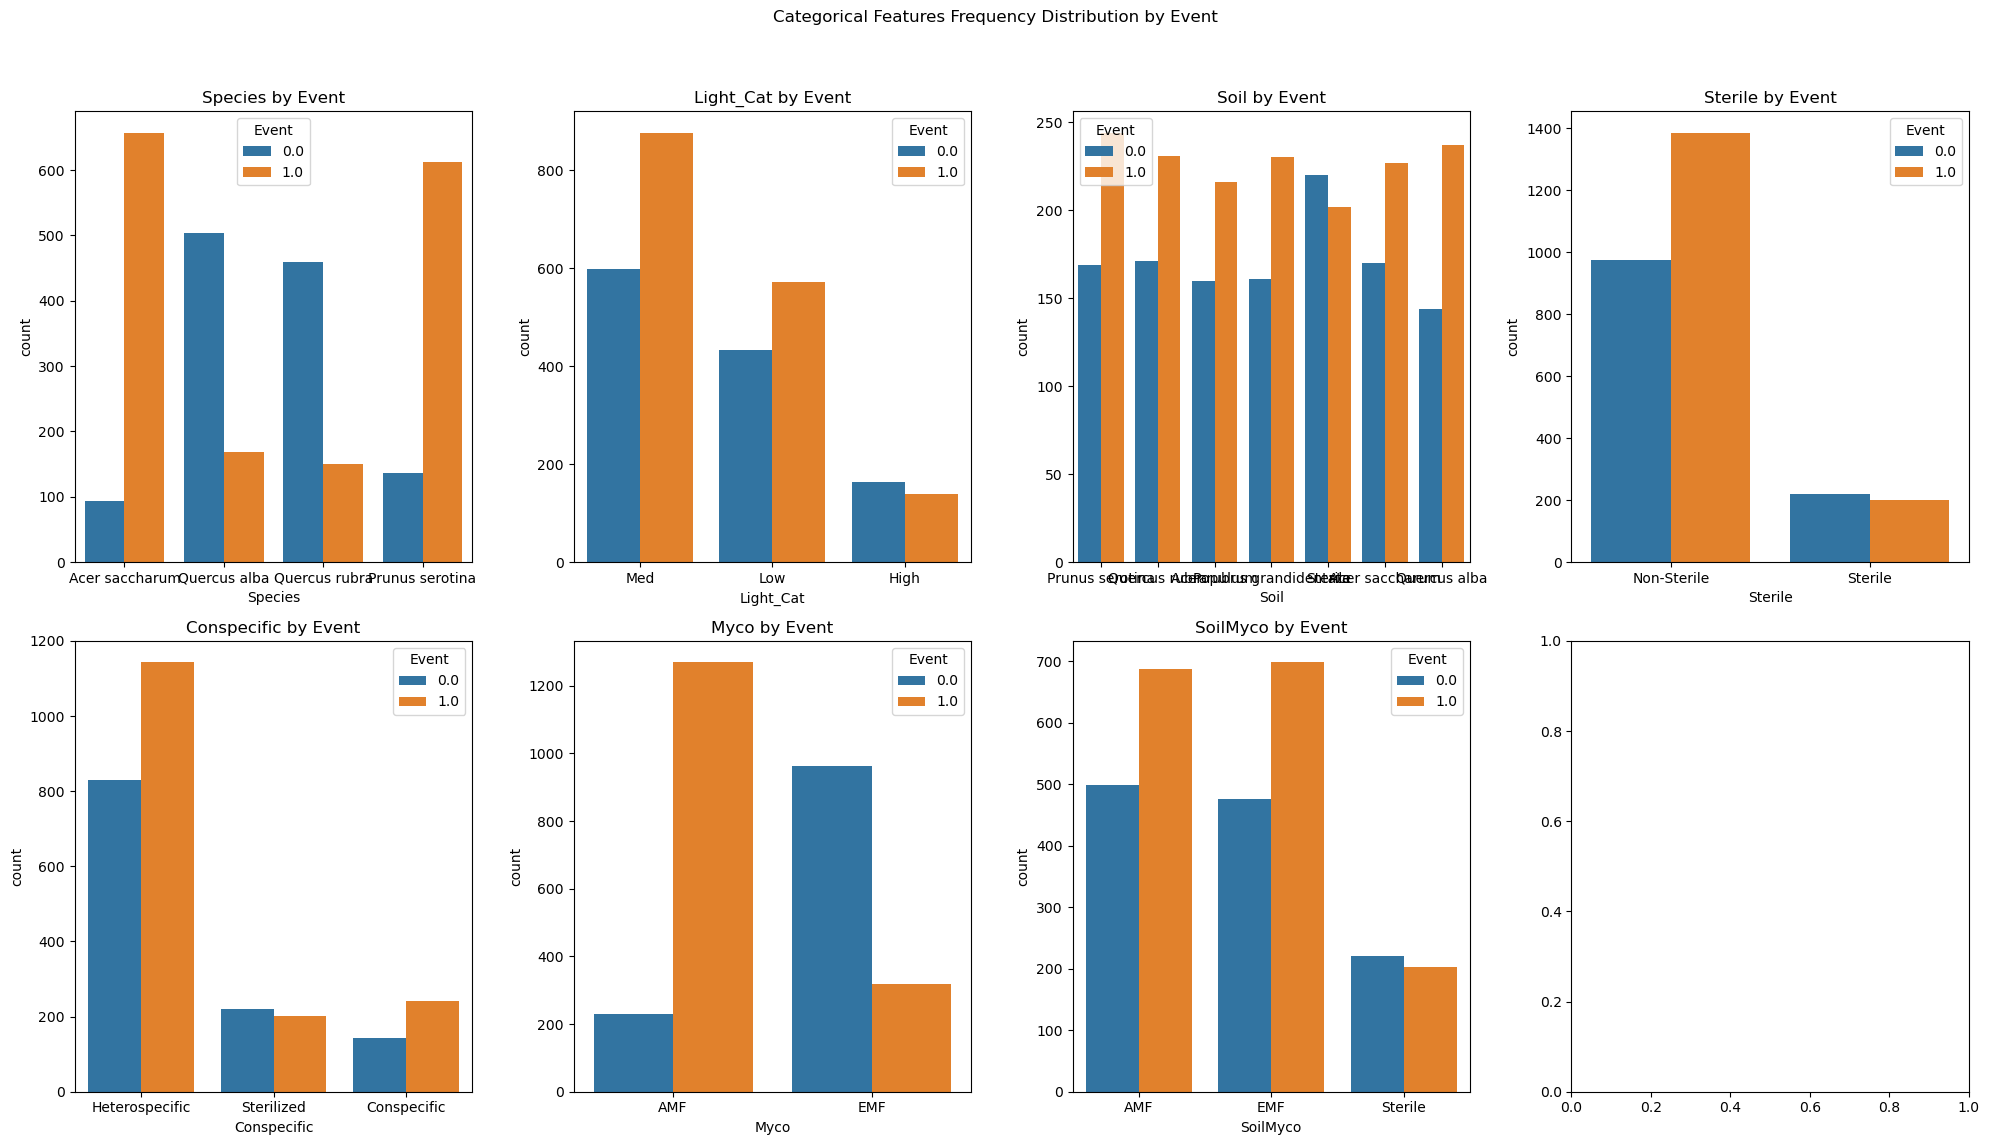

In [151]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
fig.suptitle('Categorical Features Frequency Distribution by Event')

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Event', ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(f'{col} by Event')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

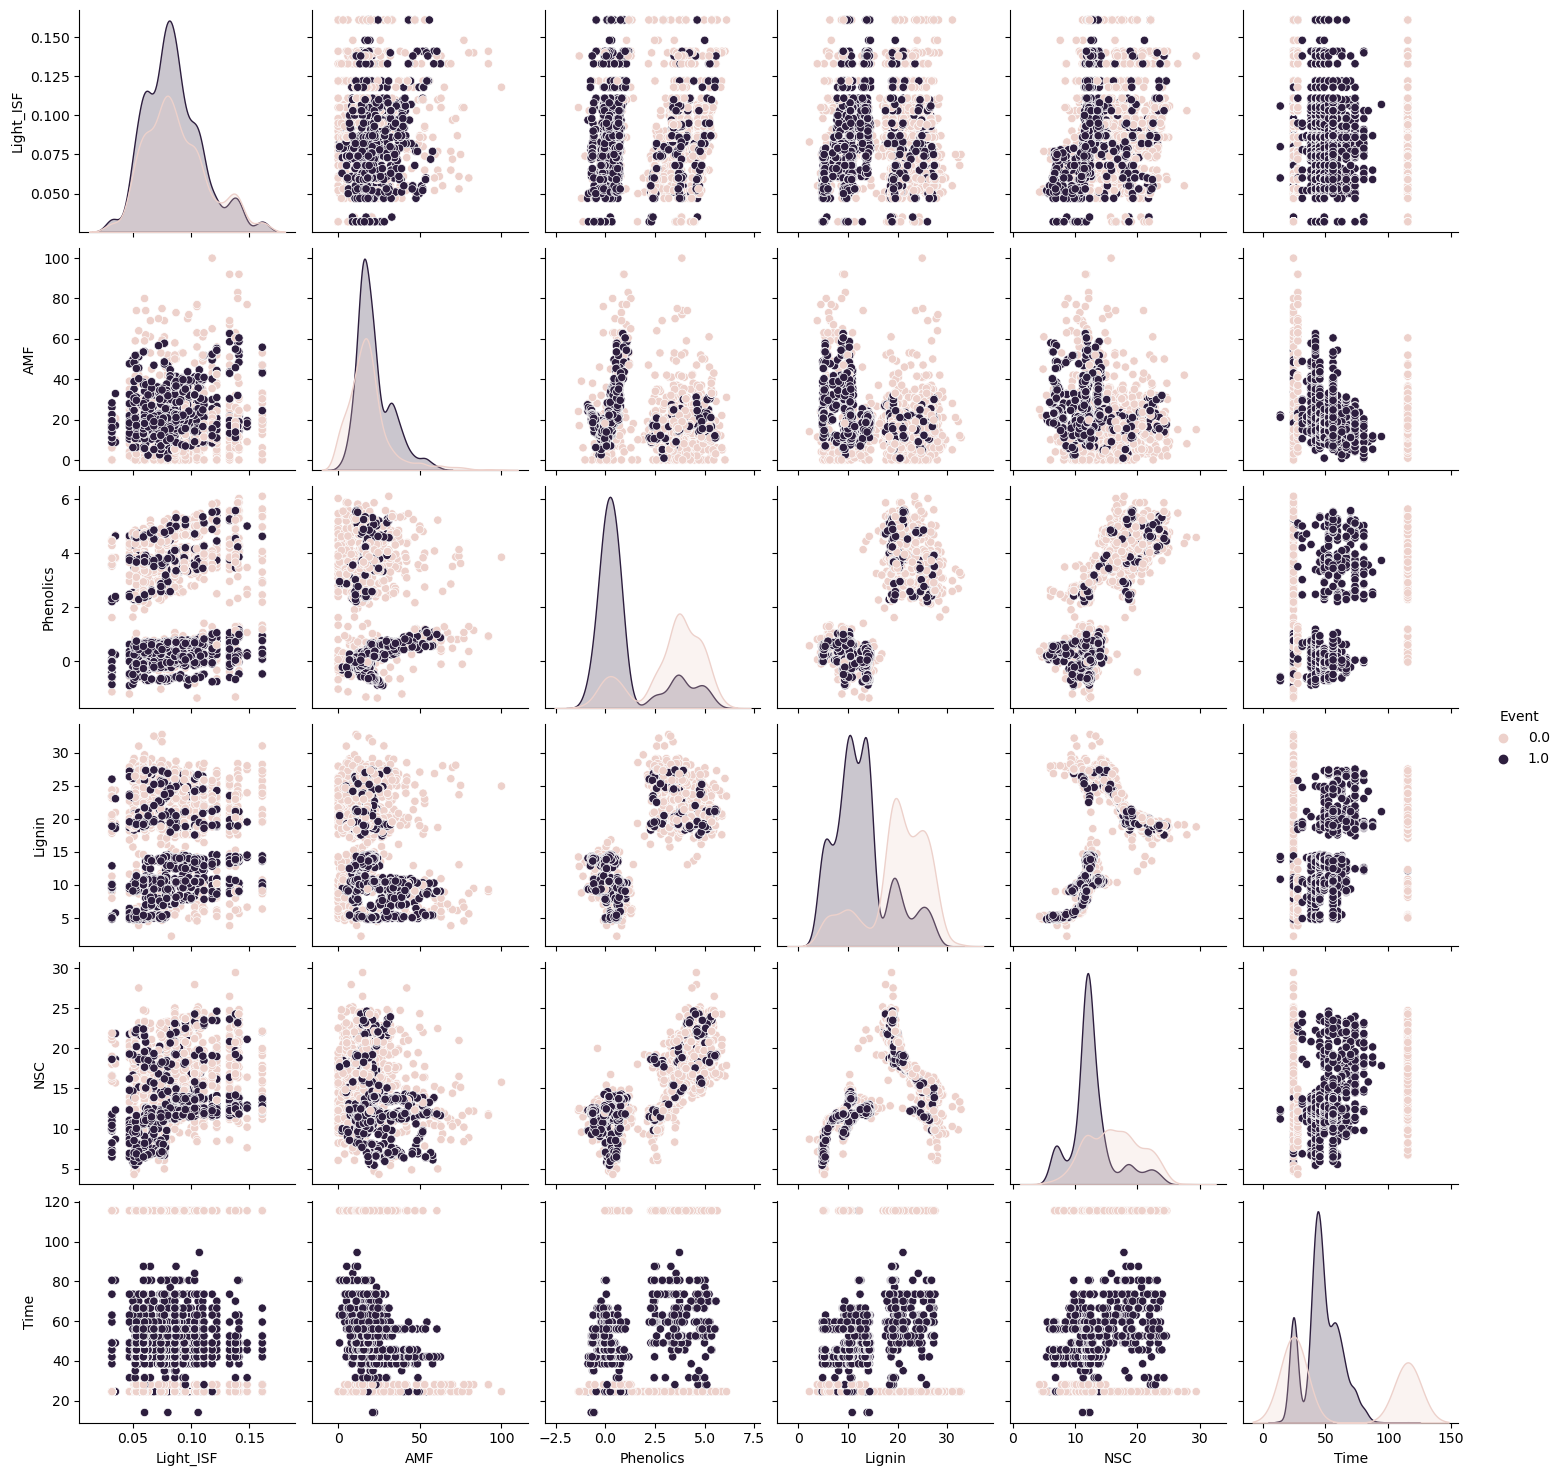

In [75]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(df, hue='Event', vars=numerical_cols)
plt.show()

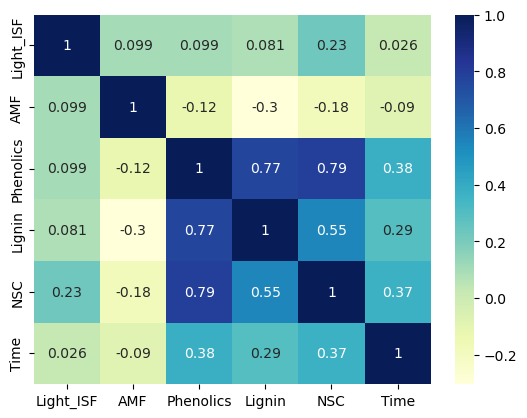

In [76]:
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

## **4.3 Data Preparation**

In [77]:
df = df.drop('EMF', axis=1)
df = df.drop('Adult', axis=1)
df = df.dropna(subset=['Event'])

In [78]:
df.columns

Index(['Species', 'Light_ISF', 'Light_Cat', 'Soil', 'Sterile', 'Conspecific',
       'Myco', 'SoilMyco', 'AMF', 'Phenolics', 'Lignin', 'NSC', 'Time',
       'Event'],
      dtype='object')

One Hot Encoding

In [79]:
#Separating the independent and dependent features
y = df['Event']
X = df.drop('Event', axis=1)

In [80]:
#categrical_columns
df_encoded = pd.get_dummies(X, drop_first=True)
categorical_cols = df_encoded.select_dtypes(include=['bool']).columns
for col in categorical_cols:
  df_encoded[col] = df_encoded[col].astype(int)
df_encoded.head()

Light_ISF    AMF  Phenolics  Lignin    NSC   Time  Species_Prunus serotina  \
0      0.106  22.00      -0.56   13.86  12.15   14.0                        0   
1      0.106  15.82       5.19   20.52  19.29  115.5                        0   
2      0.106  24.45       3.36   24.74  15.01   63.0                        0   
3      0.080  22.23      -0.71   14.29  12.36   14.0                        0   
4      0.060  21.15      -0.58   10.85  11.20   14.0                        0   

   Species_Quercus alba  Species_Quercus rubra  Light_Cat_Low  ...  \
0                     0                      0              0  ...   
1                     1                      0              0  ...   
2                     0                      1              0  ...   
3                     0                      0              0  ...   
4                     0                      0              1  ...   

   Soil_Prunus serotina  Soil_Quercus alba  Soil_Quercus rubra  Soil_Sterile  \
0                     1                  0                   0             0   
1                     0                  0                   1             0   
2                     1                  0                   0             0   
3                     1                  0                   0             0   
4                     1                  0                   0             0   

   Sterile_Sterile  Conspecific_Heterospecific  Conspecific_Sterilized  \
0                0                           1                       0   
1                0                           1                       0   
2                0                           1                       0   
3                0                           1                       0   
4                0                           1                       0   

   Myco_EMF  SoilMyco_EMF  SoilMyco_Sterile  
0         0             0                 0  
1         1             1                 0  
2         1             0                 0  
3         0             0                 0  
4         0             0                 0  

[5 rows x 23 columns]

In [81]:
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head()

Light_ISF     AMF  Phenolics    Lignin       NSC      Time  \
0   0.573643  0.2200   0.106040  0.380812  0.312127  0.000000   
1   0.573643  0.1582   0.877852  0.598887  0.596024  1.000000   
2   0.573643  0.2445   0.632215  0.737066  0.425845  0.482759   
3   0.372093  0.2223   0.085906  0.394892  0.320477  0.000000   
4   0.217054  0.2115   0.103356  0.282253  0.274354  0.000000   

   Species_Prunus serotina  Species_Quercus alba  Species_Quercus rubra  \
0                        0                     0                      0   
1                        0                     1                      0   
2                        0                     0                      1   
3                        0                     0                      0   
4                        0                     0                      0   

   Light_Cat_Low  ...  Soil_Prunus serotina  Soil_Quercus alba  \
0              0  ...                     1                  0   
1              0  ...                     0                  0   
2              0  ...                     1                  0   
3              0  ...                     1                  0   
4              1  ...                     1                  0   

   Soil_Quercus rubra  Soil_Sterile  Sterile_Sterile  \
0                   0             0                0   
1                   1             0                0   
2                   0             0                0   
3                   0             0                0   
4                   0             0                0   

   Conspecific_Heterospecific  Conspecific_Sterilized  Myco_EMF  SoilMyco_EMF  \
0                           1                       0         0             0   
1                           1                       0         1             1   
2                           1                       0         1             0   
3                           1                       0         0             0   
4                           1                       0         0             0   

   SoilMyco_Sterile  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 23 columns]

Checking for Multicolinearity using Variance Inflation Factor

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 # VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_encoded.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_encoded.values, i)
                          for i in range(len(df_encoded.columns))]

print(vif_data)

                       feature         VIF
0                    Light_ISF   20.732283
1                          AMF    7.287769
2                    Phenolics  116.896134
3                       Lignin   48.772212
4                          NSC   27.652101
5                         Time    3.063719
6      Species_Prunus serotina    5.127890
7         Species_Quercus alba         inf
8        Species_Quercus rubra         inf
9                Light_Cat_Low    9.198107
10               Light_Cat_Med    8.937829
11         Soil_Acer saccharum    2.411834
12  Soil_Populus grandidentata         inf
13        Soil_Prunus serotina    2.300204
14           Soil_Quercus alba         inf
15          Soil_Quercus rubra         inf
16                Soil_Sterile         inf
17             Sterile_Sterile         inf
18  Conspecific_Heterospecific    6.676305
19      Conspecific_Sterilized         inf
20                    Myco_EMF         inf
21                SoilMyco_EMF         inf
22         

C:\Users\nephe\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [83]:
continuous_col = X[X.describe().columns]
vif_data2 = pd.DataFrame()
vif_data2["feature"] = continuous_col.columns

# calculating VIF for each feature
vif_data2["VIF"] = [variance_inflation_factor(continuous_col.values, i)
                          for i in range(len(continuous_col.columns))]

print(vif_data2)

     feature        VIF
0  Light_ISF  12.940345
1        AMF   3.460946
2  Phenolics   5.503882
3     Lignin  11.991949
4        NSC  21.559419
5       Time   4.396416


## **4.4 Machine Learning Implementation**

### **Proportion Change Criteria**

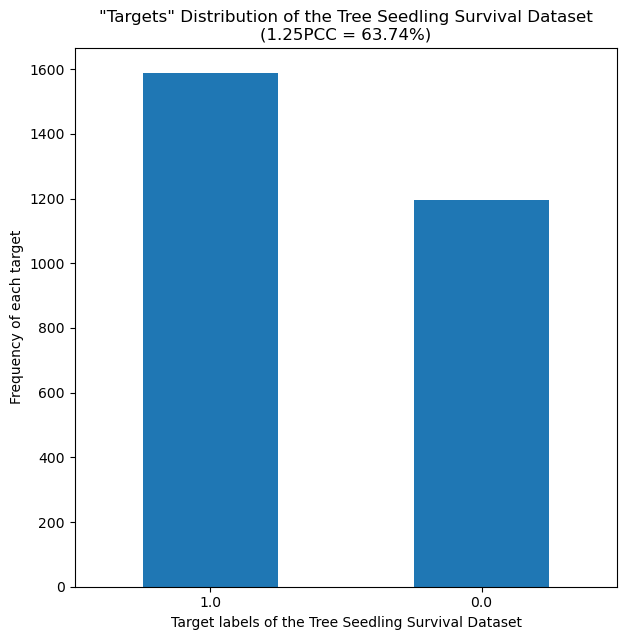

In [84]:
df_encoded_pcc = df.copy()
y = df_encoded_pcc['Event']
X = df_encoded_pcc.drop('Event', axis=1)
df_encoded_pcc = pd.get_dummies(X, drop_first=True)
for col in df_encoded_pcc:
    df_encoded_pcc[col] = df_encoded_pcc[col].astype(int)
df_encoded_pcc['Event'] = y

# PCC calculator function
def PCC_calculator(df, target_name=[], dataset_name='given', graph=True):
    target_count = Counter(df['Event'])

    df_target_count = pd.DataFrame.from_dict(target_count, orient='index', columns=['n_i'])

    PCC = ((df_target_count.n_i / df_target_count.n_i.sum()) ** 2).sum() * 1.25 * 100

    if not any(target_name):
        target_name = df_target_count.index.to_list()

    if graph:
        ax = df_target_count.plot(kind='bar', rot=0, figsize=(7, 7))
        ax.get_legend().remove()
        ax.set_ylabel('Frequency of each target')
        ax.set_xlabel(f'Target labels of the {dataset_name} Dataset')
        ax.set_title(f'"Targets" Distribution of the {dataset_name} Dataset\n'
                     f'(1.25PCC = {PCC:.2f}%)')
        ax.set_xticklabels(target_name)

    return PCC


pcc_value = PCC_calculator(df_encoded_pcc, dataset_name='Tree Seedling Survival', graph=True)


plt.show()

### Using Time as a Target Variable
#### To see the performance of the model if we are planning to use regression

In [85]:
from sklearn.preprocessing import StandardScaler

#Separating the independent and dependent features
regdf = pd.read_csv(url)

columns_to_drop = ['No', 'Plot', 'Subplot', 'PlantDate', 'Census', 'Harvest', 'Alive', 'Core', 'EMF', 'Adult']
regdf.drop(columns=columns_to_drop, inplace=True)
regdf = regdf.dropna(subset=['Event'])


#x y split
regy = regdf['Time']
regX = regdf.drop('Time', axis=1)

#categrical_columns
df_encoded_reg = pd.get_dummies(regX, drop_first=True)
for col in df_encoded_reg:
  df_encoded_reg[col] = df_encoded_reg[col].astype(int)

regX_train, regX_test, regy_train, regy_test = train_test_split(df_encoded_reg, regy, test_size=0.25, random_state=42)
scaler = StandardScaler()
regX_train = scaler.fit_transform(regX_train)
regX_test = scaler.transform(regX_test)

from sklearn.svm import SVR

regSVR = SVR(C=0.1).fit(regX_train, regy_train)

print('SVM Regression: ')
print('Train Accuracy- ' + str(regSVR.score(regX_train, regy_train)))
print('Test Accuracy- ' + str(regSVR.score(regX_test, regy_test)))

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(regX_train, regy_train)
print()
print('Decision Tree Regresssion:')
print('Train Accuracy- ' + str( dtr.score(regX_train, regy_train)))
print('Test Accuracy- ' + str( dtr.score(regX_test, regy_test)))


from sklearn.linear_model import LinearRegression

reglinreg = LinearRegression(fit_intercept=True).fit(regX_train, regy_train)
print()
print('Linear Regression:')
print('Train Accuracy- ' + str( reglinreg.score(regX_train, regy_train)))
print('Test Accuracy- ' + str(reglinreg.score(regX_test, regy_test) ))

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Initialize the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, alpha=0.001, solver='adam', random_state=42)

# Train the model
mlp.fit(regX_train, regy_train)

# Predict on the test set
regy_pred = mlp.predict(regX_test)

print()
print('MLP Regression: ')
print('Train Accuracy- ' + str(mlp.score(regX_train, regy_train) ))
print('Test Accuracy- ' + str( mlp.score(regX_test, regy_test)))




SVM Regression: 
Train Accuracy- -0.0054701808342394465
Test Accuracy- 0.00017643808772205283

Decision Tree Regresssion:
Train Accuracy- 0.9298390611346872
Test Accuracy- 0.18511143703465138

Linear Regression:
Train Accuracy- 0.17859881877889683
Test Accuracy- 0.1797584526688465

MLP Regression: 
Train Accuracy- 0.6854406820661976
Test Accuracy- 0.37474011734117585


C:\Users\nephe\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
reglin_pred = reglinreg.predict(regX_test)
regsvr_pred = regSVR.predict(regX_test)
regdt_pred = dtr.predict(regX_test)

# Evaluate the models
linmse = mean_squared_error(regy_test, reglin_pred)
svrmse = mean_squared_error(regy_test, regsvr_pred)
dtmse = mean_squared_error(regy_test, regdt_pred)

print('Mean Squared Error of Linear Regression: '+ str(linmse))
print('Mean Squared Error of SVM Regression: '+ str(svrmse))
print('Mean Squared Error of Decision Tree Regression: '+ str(dtmse))


mse = mean_squared_error(regy_test, regy_pred)
print(f'Mean Squared Error of MLP Regression: {mse}')


Mean Squared Error of Linear Regression: 829.0050680590158
Mean Squared Error of SVM Regression: 1010.5057500281231
Mean Squared Error of Decision Tree Regression: 823.5948920164441
Mean Squared Error of MLP Regression: 631.940205009978


### Based on the results of regression models:
#### The dataset is not good enough to predict the time of the seedling when will it die.
- as the accuracy score below 50%
- if we convert mse to rmse, we would know that the model is off at a margin of estimated 30 days


### Using Event as a Target Variable

### **kNN**

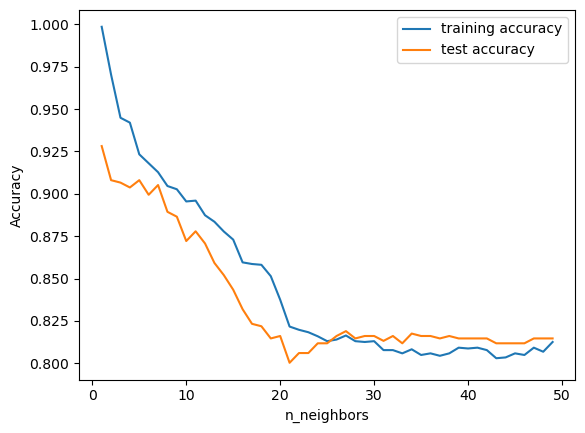

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.values, y.values, test_size=0.25, random_state=42)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 50) 

for n_neighbors in neighbors_settings:   
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)  
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train, y_train)) 
    test_accuracy.append(clf.score(X_test, y_test))   
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

n_neighbors at the range of 6,7 or 8 seemed like a good fit, other than those numbers everthing seemed to be overfitting or underfitting

In [88]:
neighbors_to_evaluate = [6, 7, 8]

for n_neighbors in neighbors_to_evaluate:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)

    print(f"n_neighbors = {n_neighbors}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print()

n_neighbors = 6
Training Accuracy: 0.9180
Test Accuracy: 0.8994

n_neighbors = 7
Training Accuracy: 0.9128
Test Accuracy: 0.9052

n_neighbors = 8
Training Accuracy: 0.9046
Test Accuracy: 0.8894



Though there's only a slight difference, I would say **{n_neighbors = 7, Training Accuracy: 0.9128, Test Accuracy: 0.9052}** suggesting a good fit without significant overfitting or underfitting.

### **Logistic Regression L1 Regularization**

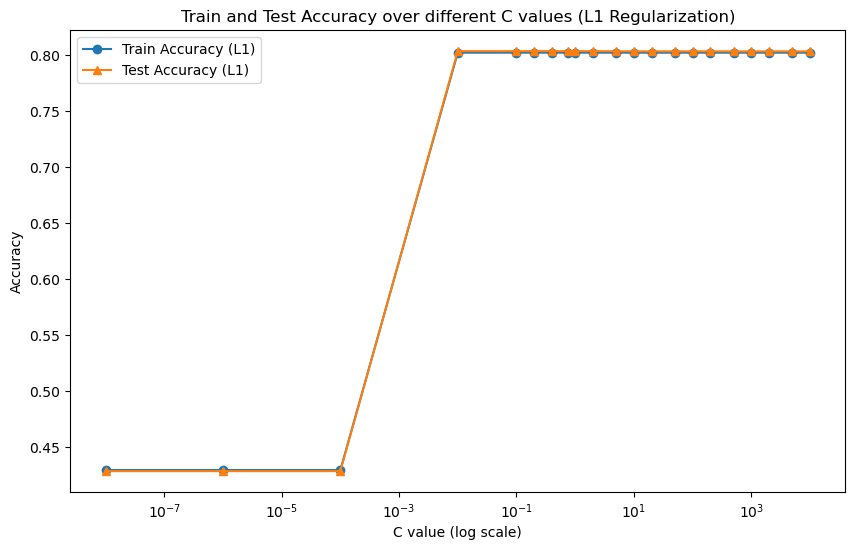

L1 Regularization:
Highest Test Set Accuracy Achieved: 0.8261494252873564
Best C Parameter: 0.01
Top Predictor Variable: Myco_EMF


In [135]:
C_values = [1e-8, 1e-6, 1e-4, 1e-2, 0.1, 0.2, 0.4, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
lahat_training_l1 = pd.DataFrame(index=C_values)
lahat_test_l1 = pd.DataFrame(index=C_values)
top_predictor_counts_l1 = {feature: 0 for feature in df_encoded.columns}
best_test_accuracy_l1 = -1
best_C_l1 = None
best_predictor_l1 = None

for seedN in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []

    for C in C_values:
        lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=C, max_iter=1000)
        lr_l1.fit(X_train, y_train)
        
        train_acc = lr_l1.score(X_train, y_train)
        test_acc = lr_l1.score(X_test, y_test)
        
        training_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        
        if test_acc > best_test_accuracy_l1:
            best_test_accuracy_l1 = test_acc
            best_C_l1 = C
            coef = lr_l1.coef_[0]
            top_predictor_index = np.argmax(np.abs(coef))
            best_predictor_l1 = df_encoded.columns[top_predictor_index]

        coef = lr_l1.coef_[0]
        top_predictor_index = np.argmax(np.abs(coef))
        top_predictor_variable = df_encoded.columns[top_predictor_index]
        top_predictor_counts_l1[top_predictor_variable] += 1

    lahat_training_l1[seedN] = training_accuracy
    lahat_test_l1[seedN] = test_accuracy

mean_train_accuracy_l1 = lahat_training_l1.mean(axis=1)
mean_test_accuracy_l1 = lahat_test_l1.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_train_accuracy_l1, label='Train Accuracy (L1)', marker='o')
plt.plot(C_values, mean_test_accuracy_l1, label='Test Accuracy (L1)', marker='^')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over different C values (L1 Regularization)')
plt.legend()
plt.show()

print(f"L1 Regularization:")
print(f"Highest Test Set Accuracy Achieved: {best_test_accuracy_l1}")
print(f"Best C Parameter: {best_C_l1}")
print(f"Top Predictor Variable: {best_predictor_l1}")

### **Logistic Regression L2 Regularization**

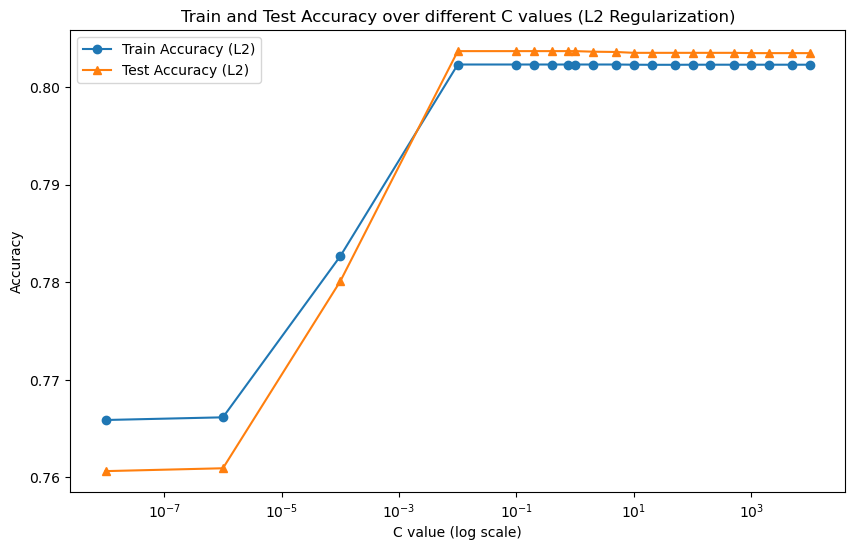

L2 Regularization:
Highest Test Set Accuracy Achieved: 0.8261494252873564
Best C Parameter: 0.01
Top Predictor Variable: Myco_EMF


In [136]:
C_values = [1e-8, 1e-6, 1e-4, 1e-2, 0.1, 0.2, 0.4, 0.75, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
lahat_training_l2 = pd.DataFrame(index=C_values)
lahat_test_l2 = pd.DataFrame(index=C_values)
top_predictor_counts_l2 = {feature: 0 for feature in df_encoded.columns}
best_test_accuracy_l2 = -1
best_C_l2 = None
best_predictor_l2 = None

for seedN in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=seedN)

    training_accuracy = []
    test_accuracy = []

    for C in C_values:
        lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=C, max_iter=1000)
        lr_l2.fit(X_train, y_train)
        
        train_acc = lr_l2.score(X_train, y_train)
        test_acc = lr_l2.score(X_test, y_test)
        
        training_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        
        if test_acc > best_test_accuracy_l2:
            best_test_accuracy_l2 = test_acc
            best_C_l2 = C
            coef = lr_l2.coef_[0]
            top_predictor_index = np.argmax(np.abs(coef))
            best_predictor_l2 = df_encoded.columns[top_predictor_index]

        coef = lr_l2.coef_[0]
        top_predictor_index = np.argmax(np.abs(coef))
        top_predictor_variable = df_encoded.columns[top_predictor_index]
        top_predictor_counts_l2[top_predictor_variable] += 1

    lahat_training_l2[seedN] = training_accuracy
    lahat_test_l2[seedN] = test_accuracy

mean_train_accuracy_l2 = lahat_training_l2.mean(axis=1)
mean_test_accuracy_l2 = lahat_test_l2.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_train_accuracy_l2, label='Train Accuracy (L2)', marker='o')
plt.plot(C_values, mean_test_accuracy_l2, label='Test Accuracy (L2)', marker='^')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy over different C values (L2 Regularization)')
plt.legend()
plt.show()

print(f"L2 Regularization:")
print(f"Highest Test Set Accuracy Achieved: {best_test_accuracy_l2}")
print(f"Best C Parameter: {best_C_l2}")
print(f"Top Predictor Variable: {best_predictor_l2}")

The results indicate that both L1 and L2 regularization methods perform similarly on our dataset, achieving the same highest accuracy and selecting the same top predictor variable (Myco_EMF). This suggests that for our data, the choice between L1 and L2 regularization does significantly impact predictive accuracy or the most influential features, as both methods achieve comparable results.

### **Linear SVM L1 Regularization**

In [93]:
from sklearn.svm import LinearSVC
C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
def graphAcc(trainAcc, testAcc, C):
  plt.figure(figsize=(12,8))
  C_values = [str(i) for i in C]
  plt.plot(C_values, trainAcc)
  plt.plot(C_values, testAcc)
  plt.legend()
  plt.show()

In [94]:
import warnings
warnings.filterwarnings("ignore")
trainAcc1 = []
testAcc1 = []
for i in C:
  l1_svm = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, C=i, fit_intercept=True).fit(X_train, y_train)
  trainAcc1.append(l1_svm.score(X_train, y_train))
  testAcc1.append(l1_svm.score(X_test, y_test))

In [95]:
l1_svm = LinearSVC(penalty="l1", loss="squared_hinge", dual=False, C=5).fit(X_train, y_train)
print(l1_svm.score(X_train, y_train))
print(l1_svm.score(X_test, y_test))

0.800575263662512
0.8089080459770115


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


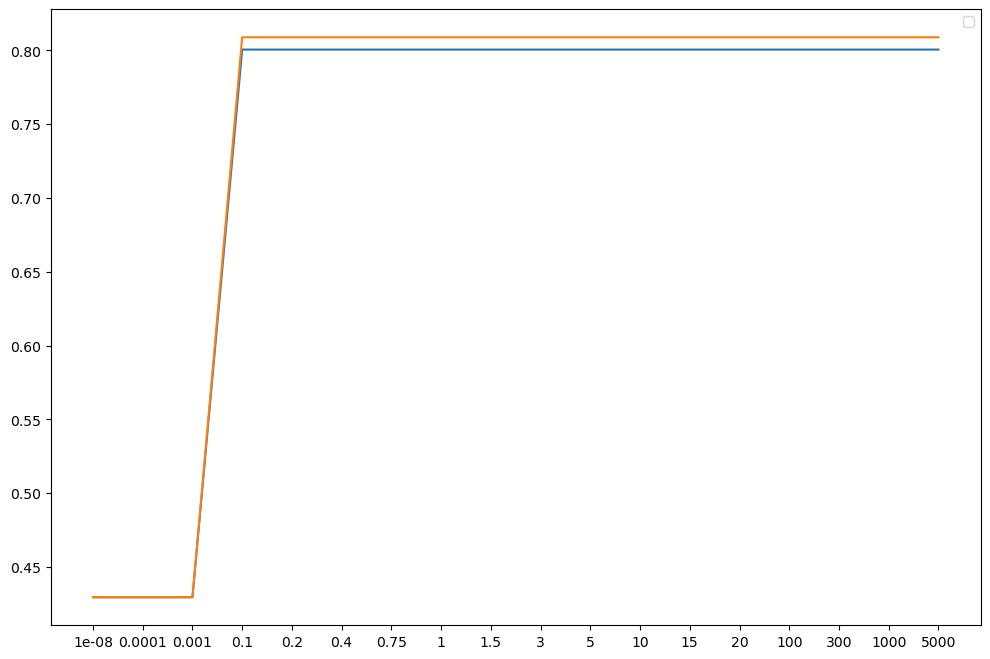

In [96]:
#L1 Regularization SVM
graphAcc(trainAcc1, testAcc1, C)

The **optimal value** of C is ranging from 0.1 and above for L1 Regularizatoin in SVM

### **Linear SVM L2 Regularization**

In [97]:
trainAcc2 = []
testAcc2 = []
for i in C:
  l2_svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=i, fit_intercept=True, max_iter=5000).fit(X_train, y_train)
  trainAcc2.append(l2_svm.score(X_train, y_train))
  testAcc2.append(l2_svm.score(X_test, y_test))

In [98]:
l2_svm = LinearSVC(penalty='l2', loss='squared_hinge', dual=True, C=0.75, fit_intercept=True).fit(X_train, y_train)
print(l2_svm.score(X_train, y_train))
print(l2_svm.score(X_test, y_test))

0.800575263662512
0.8089080459770115


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


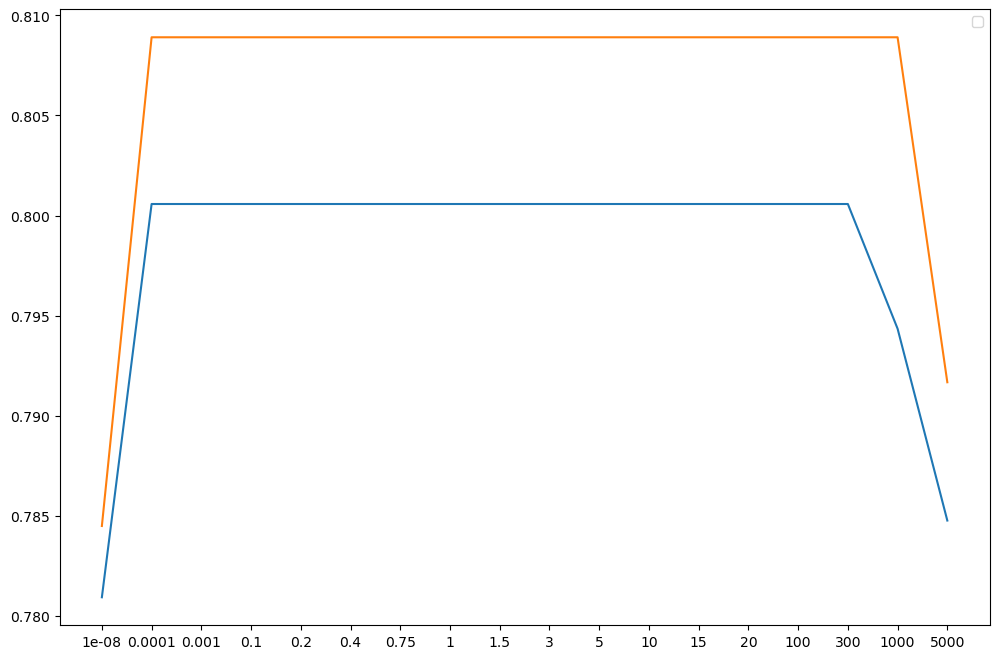

In [99]:
#L2 Regularization SVM
graphAcc(trainAcc2, testAcc2, C)

In [100]:
l2_svm_coefficients = l2_svm.coef_[0]
l1_svm_coefficients = l1_svm.coef_[0]
feature_names = [i for i in X_train]

def graphCoefficients(coefficients, title):
  plt.barh(feature_names, coefficients)
  plt.title('Top predictor Graph of ' + title)
  plt.xlabel('coefficients')
  plt.ylabel('feature')
  plt.show()

#### **Top Predictor of SVM**

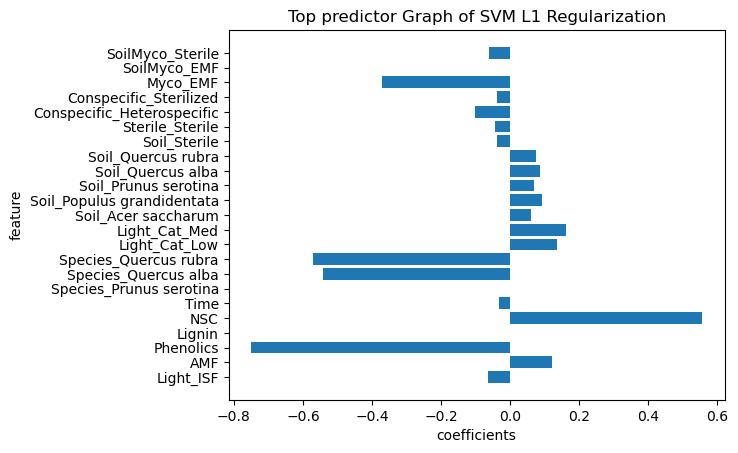

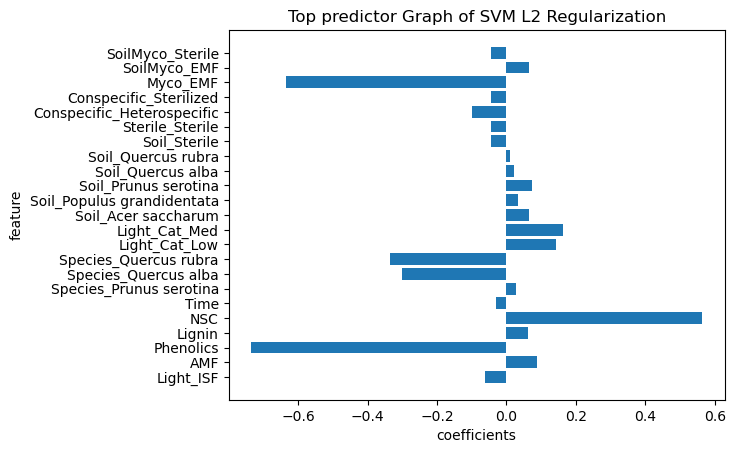

In [101]:
graphCoefficients(l1_svm_coefficients, 'SVM L1 Regularization')
graphCoefficients(l2_svm_coefficients, 'SVM L2 Regularization')

Top Predictor is Myco_EMF followed by Species_Quercus rubra and Species_Quercus alba

#### Optimal Value
The **optimal value** of C depends for L2 Regularization in SVM
The optimization problem where we use Lagrangian proved the consistency issue of the model, if we set the max iteration, it helped deal with the consistency problem



#### Highest Accuracy
The highest accuracy the both regularization of SVM achieved was 80%
- Even if we set the parameter dual to True, the highest possible accuracy is still 80%

### **Decision Trees**

In [102]:
def decision_tree_analysis(X_train, X_test, y_train, y_test, maxdepth_settings=range(1, 50), num_seeds=100):

    lahat_training = pd.DataFrame()
    lahat_test = pd.DataFrame()

    for seedN in range(1, num_seeds + 1):
        training_accuracy = []
        test_accuracy = []

        for depth in maxdepth_settings:
            tree = DecisionTreeClassifier(max_depth=depth, random_state=seedN)
            tree.fit(X_train, y_train)
            training_accuracy.append(tree.score(X_train, y_train))
            test_accuracy.append(tree.score(X_test, y_test))

        lahat_training[seedN] = training_accuracy
        lahat_test[seedN] = test_accuracy

    fig = plt.figure(figsize=(15, 6))
    plt.errorbar(maxdepth_settings, lahat_training.mean(axis=1), yerr=lahat_training.std(axis=1), label="Training accuracy")
    plt.errorbar(maxdepth_settings, lahat_test.mean(axis=1), yerr=lahat_test.std(axis=1), label="Test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.title("Model Accuracy by max_depth")
    plt.legend()

    best_depth = lahat_test.mean(axis=1).idxmax() + 1
    highest_test_accuracy = lahat_test.mean(axis=1).max()

    print(f"Highest Average Test Set Accuracy Achieved = {highest_test_accuracy:.4f}")
    print(f"Best max_depth Parameters = {best_depth}")

    return best_depth, highest_test_accuracy, fig

In [103]:
def dt_feature_importance(X_train, y_train, maxdepth, feature_names):
    tree = DecisionTreeClassifier(max_depth=maxdepth, random_state=0)
    tree.fit(X_train, y_train)

    importances = tree.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances (max_depth={maxdepth})")
    plt.barh(range(len(importances)), importances[indices], align="center")
    plt.yticks(range(len(importances)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

### **Random Forest**

In [104]:
def random_forest_classifier_analysis(X, y):

    results = {}
    lahat_training = pd.DataFrame()
    lahat_test = pd.DataFrame()

    for seedN in range(1, 50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
        training_accuracy = []
        test_accuracy = []
        max_depth_settings = range(1, 10)

        for depth in max_depth_settings:
            forest = RandomForestClassifier(max_depth=depth, random_state=0, n_estimators=100)
            forest.fit(X_train, y_train)
            training_accuracy.append(forest.score(X_train, y_train))
            test_accuracy.append(forest.score(X_test, y_test))


        lahat_training[seedN] = training_accuracy
        lahat_test[seedN] = test_accuracy


    best_max_depth = np.argmax(lahat_test.mean(axis=1)) + 1
    best_test_accuracy = np.amax(lahat_test.mean(axis=1))

    results['best_max_depth'] = best_max_depth
    results['best_test_accuracy'] = best_test_accuracy
    results['training_accuracies'] = lahat_training
    results['test_accuracies'] = lahat_test

    fig = plt.figure(figsize=(15, 6))
    plt.errorbar(max_depth_settings, lahat_training.mean(axis=1),
                 yerr=lahat_training.std(axis=1), label="Training accuracy")
    plt.errorbar(max_depth_settings, lahat_test.mean(axis=1),
                 yerr=lahat_test.std(axis=1), label="Test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("max_depth")
    plt.title("Model Accuracy by max_depth")
    plt.legend()

    return results, fig

In [105]:
def rf_feature_importance(X, y, best_max_depth):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    best_forest = RandomForestClassifier(max_depth=best_max_depth, random_state=0, n_estimators=100)
    best_forest.fit(X_train, y_train)

    importances = best_forest.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6)) 
    plt.title("Feature Importances")
    plt.barh(range(X_train.shape[1]), importances[indices], align="center") 
    plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=0)  
    plt.ylim([-1, X_train.shape[1]])  
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()  
    plt.show()

### **Gradient Boosting Method**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
gradientBoostingModel = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
print("Training Accuracy: ", gradientBoostingModel.score(X_train, y_train))
print("Testing Accuracy: ", gradientBoostingModel.score(X_test, y_test))

def plot_feature_importances(model, features):
    n_features = len(features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show()

    plot_feature_importances(gradientBoostingModel, X.columns)

Training Accuracy:  0.9769894534995206
Testing Accuracy:  0.9755747126436781


In [108]:
def graphHyperparameterTuning(parameterRange, scores, title, xlabel):
    plt.plot(parameterRange, scores[0], label='Train')
    plt.plot(parameterRange, scores[1], label='Test')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

##### Max depth parameter from 1 to 11




In [109]:
trainScores = []
testScores = []
print('Performance of model by tuning max depth')
for i in range(1, 11):
    gradientBoostingModel.set_params(max_depth=i)
    gradientBoostingModel.fit(X_train, y_train)
    trainAcc = gradientBoostingModel.score(X_train, y_train)
    testAcc = gradientBoostingModel.score(X_test, y_test)
    trainScores.append(trainAcc)
    testScores.append(testAcc)
    print(f'Model: max depth={i}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning max depth
Model: max depth=1
Train Accuracy: 0.9558964525407478
Test Accuracy: 0.9568965517241379

Model: max depth=2
Train Accuracy: 0.9669223394055608
Test Accuracy: 0.9683908045977011

Model: max depth=3
Train Accuracy: 0.9769894534995206
Test Accuracy: 0.9755747126436781

Model: max depth=4
Train Accuracy: 0.9865771812080537
Test Accuracy: 0.9712643678160919

Model: max depth=5
Train Accuracy: 0.9961649089165868
Test Accuracy: 0.9755747126436781

Model: max depth=6
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781

Model: max depth=7
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781

Model: max depth=8
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9770114942528736

Model: max depth=9
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781

Model: max depth=10
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781



##### Learning rate parameter [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

In [110]:
trainScores2 = []
testScores2 = []
learningRate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.10]
print('Performance of model by tuning Learning rate')
for lr in learningRate:
    gradientBoostingModel.set_params(learning_rate=lr)
    gradientBoostingModel.fit(X_train, y_train)
    trainAcc = gradientBoostingModel.score(X_train, y_train)
    testAcc = gradientBoostingModel.score(X_test, y_test)
    trainScores2.append(trainAcc)
    testScores2.append(testAcc)
    print(f'Model: learning rate={lr}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning Learning rate
Model: learning rate=0.0001
Train Accuracy: 0.5704697986577181
Test Accuracy: 0.5704022988505747

Model: learning rate=0.001
Train Accuracy: 0.5704697986577181
Test Accuracy: 0.5704022988505747

Model: learning rate=0.01
Train Accuracy: 0.9918504314477469
Test Accuracy: 0.9712643678160919

Model: learning rate=0.1
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781

Model: learning rate=0.2
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9813218390804598

Model: learning rate=0.3
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9798850574712644

Model: learning rate=0.4
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9827586206896551

Model: learning rate=0.5
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9841954022988506

Model: learning rate=0.6
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781

Model: learning rate=0.7
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.978448275862069



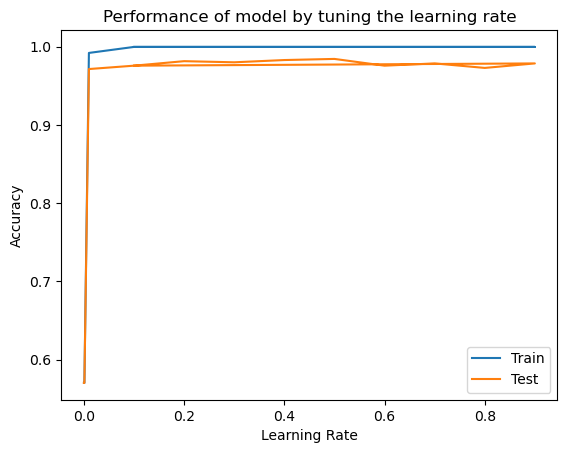

In [111]:
graphHyperparameterTuning(learningRate, [trainScores2, testScores2], 'Performance of model by tuning the learning rate', 'Learning Rate')

##### we trying to increase the max depht and learning rate

In [112]:
# Hyperparameter tuning: learning_rate and max_depth
trainScores4 = []
testScores4 = []
print('Performance of model by tuning Learning rate and max depth')
for lr in learningRate:
    gradientBoostingModel.set_params(learning_rate=lr, max_depth=learningRate.index(lr) + 1)
    gradientBoostingModel.fit(X_train, y_train)
    trainAcc = gradientBoostingModel.score(X_train, y_train)
    testAcc = gradientBoostingModel.score(X_test, y_test)
    trainScores4.append(trainAcc)
    testScores4.append(testAcc)
    print(f'Model: max depth={learningRate.index(lr) + 1}, learning rate={lr}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning Learning rate and max depth
Model: max depth=1, learning rate=0.0001
Train Accuracy: 0.5704697986577181
Test Accuracy: 0.5704022988505747

Model: max depth=2, learning rate=0.001
Train Accuracy: 0.5704697986577181
Test Accuracy: 0.5704022988505747

Model: max depth=3, learning rate=0.01
Train Accuracy: 0.9525407478427612
Test Accuracy: 0.9583333333333334

Model: max depth=4, learning rate=0.1
Train Accuracy: 0.9865771812080537
Test Accuracy: 0.9712643678160919

Model: max depth=5, learning rate=0.2
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9755747126436781

Model: max depth=6, learning rate=0.3
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9798850574712644

Model: max depth=7, learning rate=0.4
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9827586206896551

Model: max depth=8, learning rate=0.5
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9813218390804598

Model: max depth=9, learning rate=0.6
Train Accuracy: 0.999520613614573

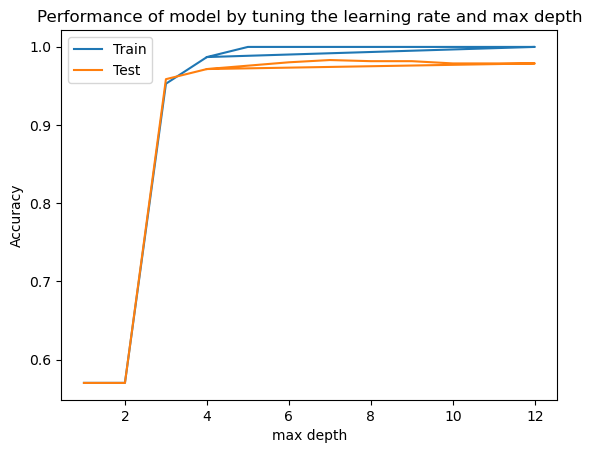

In [113]:
graphHyperparameterTuning([learningRate.index(lr) + 1 for lr in learningRate], [trainScores4, testScores4], 'Performance of model by tuning the learning rate and max depth', 'max depth')

##### We test lowering the learning rate and maximizing the depth

In [114]:
trainScores5 = []
testScores5 = []
print('Performance of model by tuning Learning rate and max depth with a negative relationship')
for lr in learningRate:
    gradientBoostingModel.set_params(learning_rate=-lr + 1, max_depth=learningRate.index(lr) + 1)
    gradientBoostingModel.fit(X_train, y_train)
    trainAcc = gradientBoostingModel.score(X_train, y_train)
    testAcc = gradientBoostingModel.score(X_test, y_test)
    trainScores5.append(trainAcc)
    testScores5.append(testAcc)
    print(f'Model: max depth={learningRate.index(lr) + 1}, learning rate={lr}')
    print(f'Train Accuracy: {trainAcc}')
    print(f'Test Accuracy: {testAcc}\n')

Performance of model by tuning Learning rate and max depth with a negative relationship
Model: max depth=1, learning rate=0.0001
Train Accuracy: 0.9726749760306808
Test Accuracy: 0.9698275862068966

Model: max depth=2, learning rate=0.001
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.978448275862069

Model: max depth=3, learning rate=0.01
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9683908045977011

Model: max depth=4, learning rate=0.1
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9712643678160919

Model: max depth=5, learning rate=0.2
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9727011494252874

Model: max depth=6, learning rate=0.3
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9813218390804598

Model: max depth=7, learning rate=0.4
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9813218390804598

Model: max depth=8, learning rate=0.5
Train Accuracy: 0.9995206136145733
Test Accuracy: 0.9813218390804598

Model: max depth=9, learning rate=0.6
Train

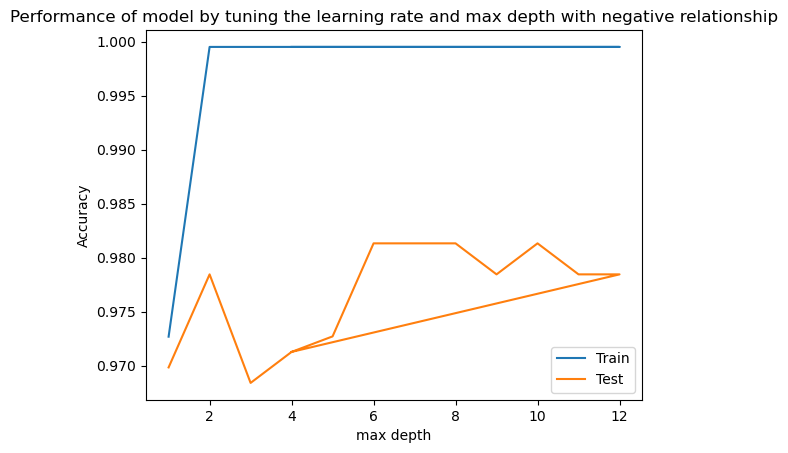

In [115]:
graphHyperparameterTuning([learningRate.index(lr) + 1 for lr in learningRate], [trainScores5, testScores5], 'Performance of model by tuning the learning rate and max depth with negative relationship', 'max depth')

In [116]:
best_test_score = -1
best_max_depth = None
best_learning_rate = None

for lr in learningRate:
    for depth in range(1, len(learningRate) + 1):
        gradientBoostingModel.set_params(learning_rate=lr, max_depth=depth)
        gradientBoostingModel.fit(X_train, y_train)
        
        trainAcc = gradientBoostingModel.score(X_train, y_train)
        testAcc = gradientBoostingModel.score(X_test, y_test)
        if testAcc > best_test_score:
            best_test_score = testAcc
            best_max_depth = depth
            best_learning_rate = lr
            
for lr in learningRate:
    for depth in range(1, len(learningRate) + 1):
        gradientBoostingModel.set_params(learning_rate=-lr + 1, max_depth=depth)
        gradientBoostingModel.fit(X_train, y_train)
        
        trainAcc = gradientBoostingModel.score(X_train, y_train)
        testAcc = gradientBoostingModel.score(X_test, y_test)
        if testAcc > best_test_score:
            best_test_score = testAcc
            best_max_depth = depth
            best_learning_rate = -lr + 1


In [138]:
def gbm_feature_importance(X, y, params):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    best_gbc = GradientBoostingClassifier(learning_rate=params['learning_rate'], max_depth=params['max_depth'], random_state=42, n_estimators=100)
    best_gbc.fit(X_train, y_train)

    importances = best_gbc.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.barh(range(X_train.shape[1]), importances[indices], align="center")
    plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=0)
    plt.ylim([-1, X_train.shape[1]])
    plt.xlabel('Importance')
    plt.show()

## **5 Results and Discussion**

### **Model Results**


| Machine Learning Method | Test Accuracy | Best Parameter | Top Predictor Variable |
| -: | :-: | :-: | -: |
| **kNN** | 0.9052 | n=7 | NA
| **Logistic Regression with L1-Regularization** | 0.8261 | 0.01 | Myco_EMF |
| **Logistic Regression with L2-Regularization**	| 0.8261  |  0.01  | Myco_EMF |
| **Linear SVM with L1-Regularization** | 0.803 | 0.1 | Phenolics |
| **Linear SVM with L2-Regularization** | 0.801 | 0.75 | Phenolics |



### **Machine Learning Algorithm (cont. Decision Tree)**


Highest Average Test Set Accuracy Achieved = 0.9697
Best max_depth Parameters = 8


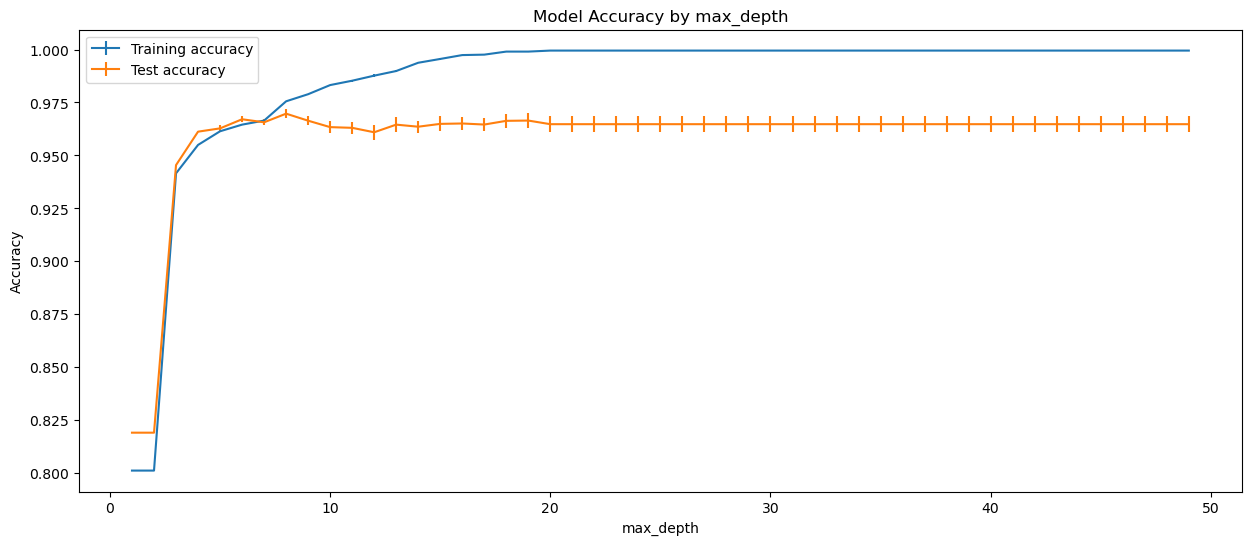

In [118]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=1)
best_depth, highest_test_accuracy, fig = decision_tree_analysis(X_train, X_test, y_train, y_test)
fig.show()

### **Machine Learning Algorithm (cont. Random Forest)**


Highest Average Test Set Accuracy Achieved = 0.9539
Best max_depth = 9


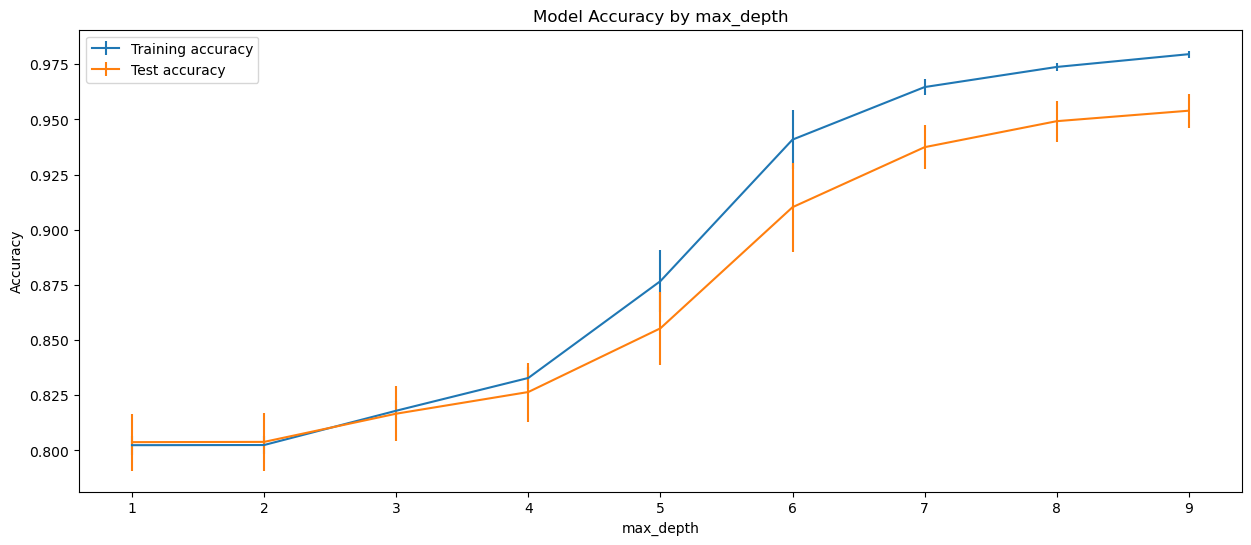

In [119]:
results, fig = random_forest_classifier_analysis(df_encoded, y)

print(f"Highest Average Test Set Accuracy Achieved = {results['best_test_accuracy']:.4f}")
print(f"Best max_depth = {results['best_max_depth']}")

plt.show()

### **Machine Learning Algortihm (cont. Gradient Boosting Method)**

In [120]:
print(f'Best Test Accuracy: {best_test_score:.4f}')
print(f'Best max_depth: {best_max_depth}')
print(f'Best learning rate: {best_learning_rate}')

Best Test Accuracy: 0.9842
Best max_depth: 10
Best learning rate: 0.5


### **5.1 Feature Importance of Top Models**

#### **Feature Importance of Gradient Boosting**

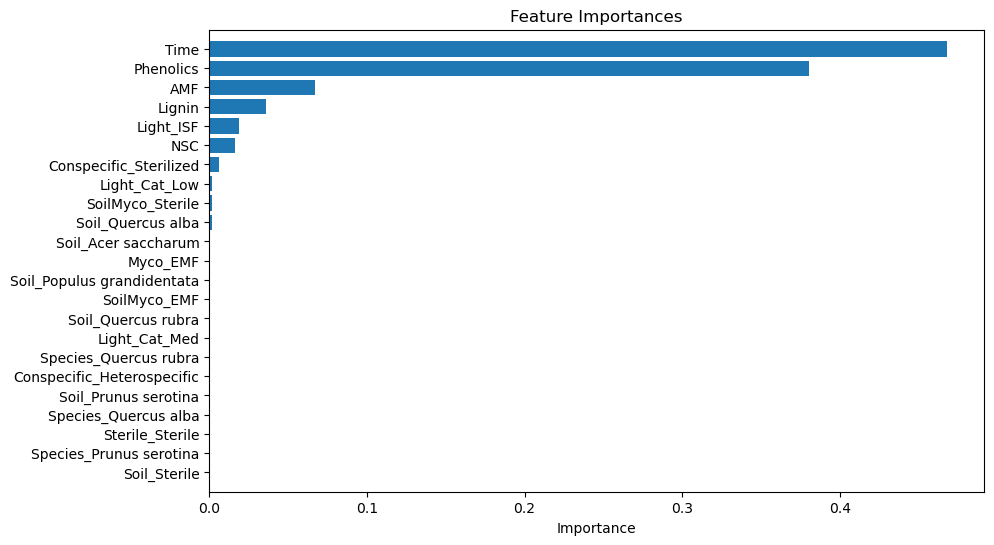

In [139]:
params = {'learning_rate': 0.5, 'max_depth': 10}
gbm_feature_importance(df_encoded, y, params)

#### **Feature Importance of Decision Tree**

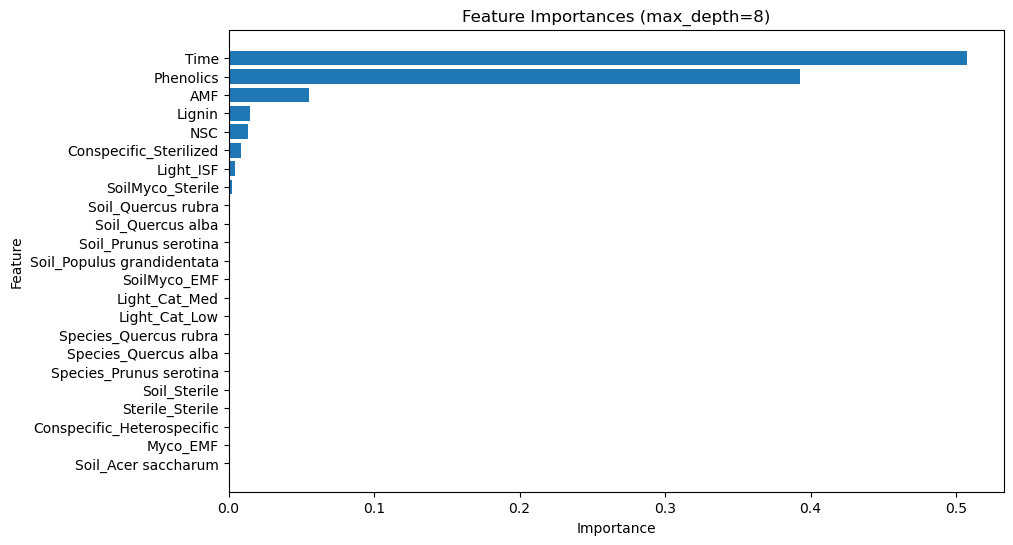

In [122]:
dt_feature_importance(X_train, y_train, best_depth, X_train.columns)

#### **Feature Importance of Random Forest**

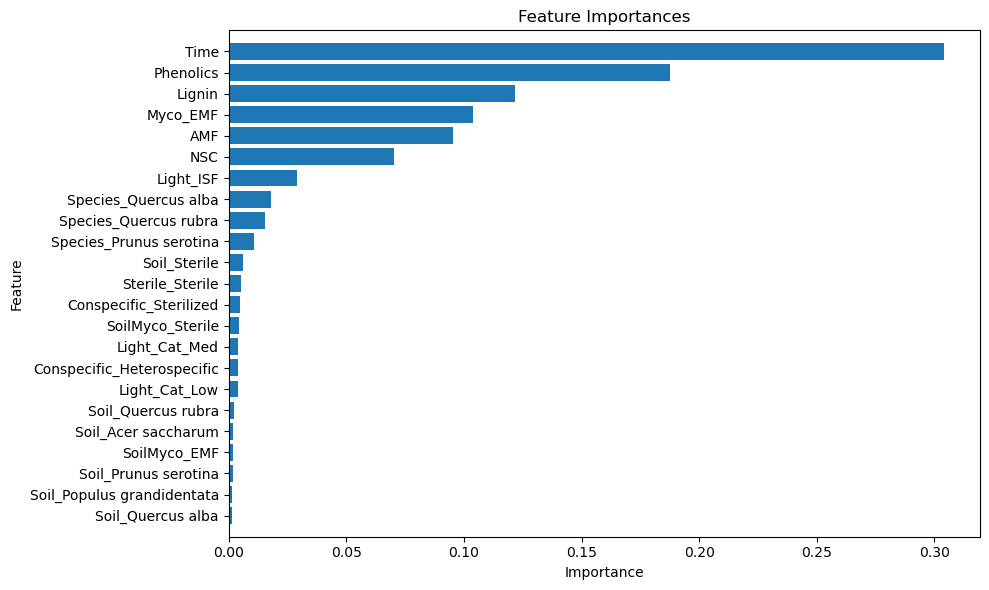

In [123]:
rf_feature_importance(df_encoded, y, best_max_depth)

### **SHAP (SHapley Additive exPlanations)**

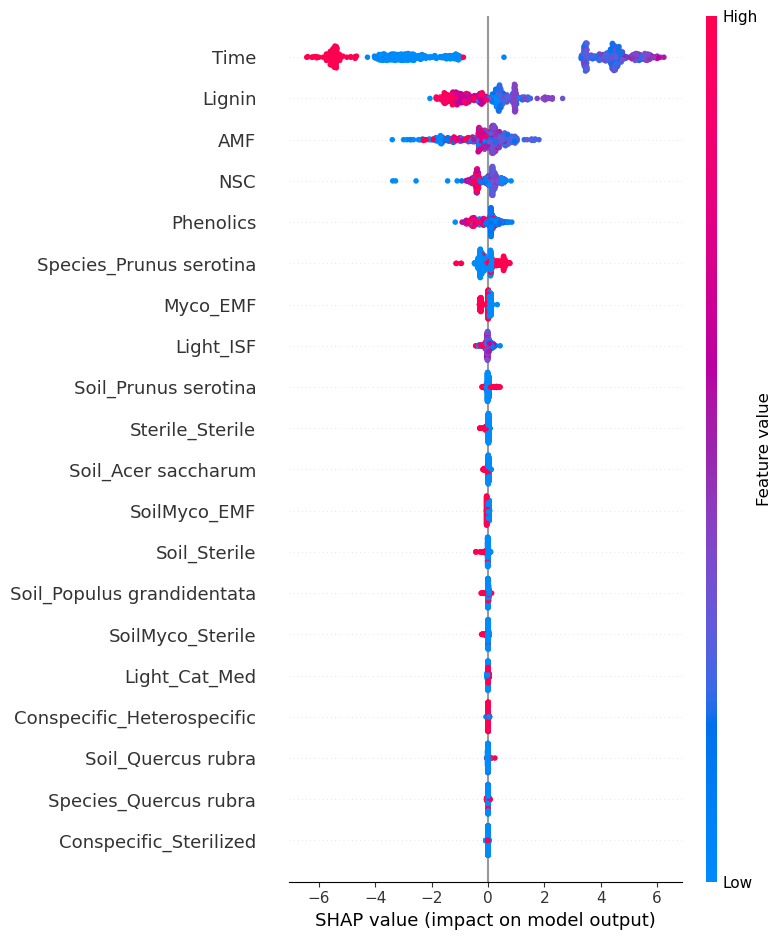

In [142]:
best_max_depth = 6
best_gbc = GradientBoostingClassifier(max_depth=best_max_depth, random_state=42, n_estimators=100)
best_gbc.fit(X_train, y_train)

explainer = shap.Explainer(best_gbc, X_train)

shap_values = explainer(X_test, check_additivity=False)

shap.summary_plot(shap_values, X_test)

**Interpreting the SHAP graph of the Gradient Boosting Classifier**

| Feature | Seeds that Die (Event = 1)| Seeds that Stay Alive (Event = 0) |
| :- | :-: | :-: |
| **Time** | Seeds that have been around for a longer time (red dots) are more likely to die. <br>  | Seeds that have been around for a shorter time are more likely to be alive. <br>Low time values (blue dots) decrease the chance of death. |
| **Lignin** | Seeds with lower lignin content(blue dots) are more likely to die. <br> | Seeds with higher lignin content(red dots) are more likely to be alive. |
| **AMF** |  Seeds with lower levels of arbuscular mycorrhizal fungi (AMF) (blue dots) are more likely to die.  |   Seeds with higher levels of arbuscular mycorrhizal fungi(AMF) --Red Dots are more likely to be alive.|
| **Phenolics** | Seeds with lower phenolics(blue dots) are more likely to die. |  Seeds with higher phenolics are more likely to be alive (red dots).
| **Species** | Some species are more likely to die than others. |  Some species are more likely to survive than others.
| **Other factors** | Things like soil type, light conditions, and non-structural carbohydrates (NSC) <br> also affect survival, but they are less important than the top factors. | Certain soil types, better light conditions, and other specific environmental <br> factors can increase the likelihood of seedling survival.

**Summary:**

Seeds that tend to die are often found in all soil types, under low and medium light conditions, and have lower levels of protective substances like lignin, AMF, and phenolics. Specific species such as Prunus serotina and Quercus alba are also more prone to death under these conditions.On the other hand, seeds that stay alive are with higher levels of protective substances like lignin, AMF, and phenolics. These seeds are also typically younger, as longer time periods increase the likelihood of death.

### **5.2 Model Evaluation**

Confusion Matrix:
[[285   9]
 [  6 396]]


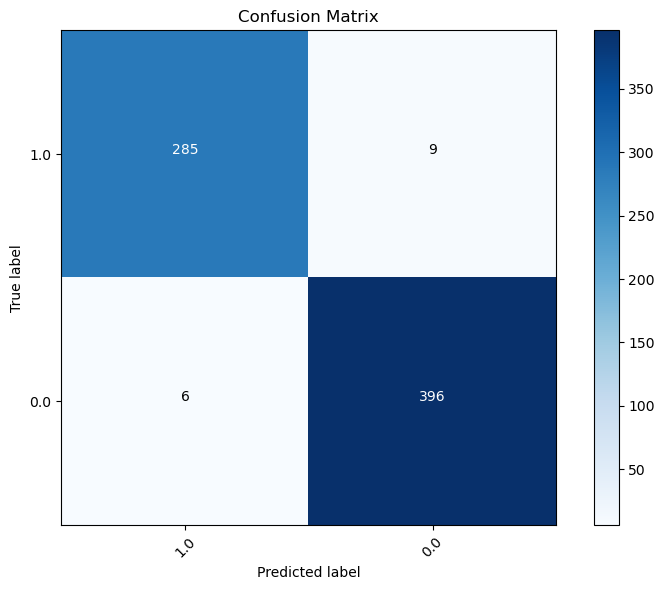


Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       294
         1.0       0.98      0.99      0.98       402

    accuracy                           0.98       696
   macro avg       0.98      0.98      0.98       696
weighted avg       0.98      0.98      0.98       696



In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=42)

best_gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=10, random_state=42)
best_gbc.fit(X_train, y_train)

y_pred = best_gbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)


The confusion matrix shows the performance of the model in terms of true positives, true negatives, false positives, and false negatives. Here, the model correctly predicted 285 seedlings that died (true positives) and 396 seedlings that survived (true negatives). There were 9 false positives (predicted to survive but actually died) and 6 false negatives (predicted to die but actually survived). This indicates the model is highly accurate, with very few mistakes in predicting seedling survival and death.

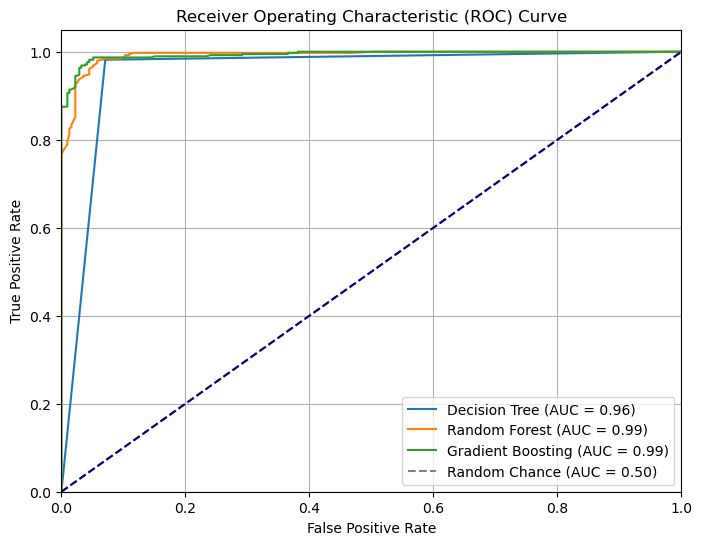

In [128]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.25, random_state=0)

classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0)
}

y_random = [0] * len(y_test)
plt.figure(figsize=(8, 6))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

fpr_random, tpr_random, _ = roc_curve(y_test, y_random)
roc_auc_random = auc(fpr_random, tpr_random)
plt.plot(fpr_random, tpr_random, linestyle='--', color='gray', label=f'Random Chance (AUC = {roc_auc_random:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC (Receiver Operating Characteristic) curve compares the true positive rate (sensitivity) against the false positive rate for three different models: Decision Tree, Random Forest, and Gradient Boosting. The closer the curve is to the top-left corner, the better the model. The AUC (Area Under the Curve) scores show that Random Forest and Gradient Boosting models have excellent performance (AUC = 0.99), while the Decision Tree is also very good (AUC = 0.96). This means all three models are highly effective at distinguishing between seedlings that will die and those that will survive, with Random Forest and Gradient Boosting being slightly better.

### **6 Conclusion**

- The factors with the most significant impact on the survival rates of different tree species, according to the feature importance plot of the gradient boosting model, are most significantly impacted by the duration they have been monitored (Time), levels of phenolic compounds (Phenolics), presence of arbuscular mycorrhizal fungi (AMF), lignin content (Lignin), light intensity (Light_ISF), and non-structural carbohydrates (NSC). These factors influence growth, defense mechanisms, and the ability to withstand environmental stressors, thereby determining the likelihood of survival.

- The likelihood of death for each seedling can be predicted based on time, as demonstrated in the study, which utilized a Gradient Boosting Classifier to predict seedling survival. The SHAP (SHapley Additive exPlanations) values indicated that time is a critical factor, revealing that seedlings that have been around for a shorter period are more likely to survive, while those that have been around longer have a higher likelihood of death.

- Seeds that tend to die are often found in all soil types, under low and medium light conditions, and have lower levels of protective substances like lignin, AMF, and phenolics. Specific species such as Prunus serotina and Quercus alba are also more prone to death under these conditions.On the other hand, seeds that stay alive are with higher levels of protective substances like lignin, AMF, and phenolics. These seeds are also typically younger, as longer time periods increase the likelihood of death.

Overall, this study highlights the importance of these factors in distinguishing between the survival and mortality outcomes of tree seedlings under varying environmental conditions.

### **7 References**



*   seedling. (2024). In Merriam-Webster Dictionary. https://www.merriam-webster.com/dictionary/seedling#:~:text=1,before%20it%20becomes%20a%20sapling
*   Wikipedia contributors. (2024, May 23). Tree planting. Wikipedia. https://en.wikipedia.org/wiki/Tree_planting
*   Tree Planting Philippines – Eight Benefits of Tree Planting (n.d.-b). https://onetotree.org/news/benefits-of-tree-planting/
*   Wood, Katherine; Kobe, Richard; Ibáñez, Inés; McCarthy-Neumann, Sarah (2023). Tree seedling functional traits mediate plant-soil feedback survival responses across a gradient of light availability [Dataset]. Dryad. https://doi.org/10.5061/dryad.xd2547dpw




